In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/data_farfetch_plp_usa_e0001_20230623.txt'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from urllib.request import urlopen
from PIL import Image
from skimage import io

In [ ]:
df = pd.read_csv('/content/data_farfetch_plp_usa_e0001_20230623.txt', sep = ';', header = None)

In [ ]:
columns = ['Website_name','Competence_date', 'Country_code','Currency_Code',
           'Brand','Category_1', 'Category_2','Category_3', 'Product_code',
           'Product_title', 'URL', 'image_URL','Full_price_USD','Discounted_price_USD',
           'Full_price_EUR','Discounted_price_EUR','Flag']
df.columns = columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111912 entries, 0 to 111911
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Website_name          111912 non-null  object 
 1   Competence_date       111912 non-null  object 
 2   Country_code          111912 non-null  object 
 3   Currency_Code         111912 non-null  object 
 4   Brand                 111912 non-null  object 
 5   Category_1            111912 non-null  object 
 6   Category_2            111912 non-null  object 
 7   Category_3            69650 non-null   object 
 8   Product_code          111911 non-null  float64
 9   Product_title         111911 non-null  object 
 10  URL                   111911 non-null  object 
 11  image_URL             111911 non-null  object 
 12  Full_price_USD        111911 non-null  float64
 13  Discounted_price_USD  111911 non-null  float64
 14  Full_price_EUR        111911 non-null  float64
 15  

In [ ]:
df.describe().T

count          mean           std          min  \
Product_code          111911.0  1.859469e+07  1.628982e+06  10047577.00   
Full_price_USD        111911.0  9.111674e+02  4.512169e+03        10.00   
Discounted_price_USD  111911.0  7.928728e+02  4.462929e+03        10.00   
Full_price_EUR        111911.0  8.382355e+02  4.151029e+03         9.19   
Discounted_price_EUR  111911.0  7.294087e+02  4.105731e+03         9.19   
Flag                  111911.0  5.178222e-01  4.996845e-01         0.00   

                              25%          50%          75%          max  
Product_code          17953251.00  19102660.00  19739578.50  20713172.00  
Full_price_USD             199.00       395.00       800.00    795000.00  
Discounted_price_USD       160.00       318.00       639.00    795000.00  
Full_price_EUR             183.07       363.38       735.97    731370.74  
Discounted_price_EUR       147.19       292.54       587.85    731370.74  
Flag                         0.00         1.00         1.00         1.00

In [ ]:
df.isnull().sum()

Website_name                0
Competence_date             0
Country_code                0
Currency_Code               0
Brand                       0
Category_1                  0
Category_2                  0
Category_3              42262
Product_code                1
Product_title               1
URL                         1
image_URL                   1
Full_price_USD              1
Discounted_price_USD        1
Full_price_EUR              1
Discounted_price_EUR        1
Flag                        1
dtype: int64

In [ ]:
df.nunique()

Website_name                 1
Competence_date              1
Country_code                 1
Currency_Code                1
Brand                     2891
Category_1                  38
Category_2                 245
Category_3                 410
Product_code            111911
Product_title            86156
URL                     111911
image_URL               111911
Full_price_USD            5494
Discounted_price_USD      5244
Full_price_EUR            5494
Discounted_price_EUR      5244
Flag                         2
dtype: int64

In [ ]:
cols = []
for i in df.columns:
    if df[i].nunique() != 1:
        cols.append(i)

In [ ]:
cols

['Brand',
 'Category_1',
 'Category_2',
 'Category_3',
 'Product_code',
 'Product_title',
 'URL',
 'image_URL',
 'Full_price_USD',
 'Discounted_price_USD',
 'Full_price_EUR',
 'Discounted_price_EUR',
 'Flag']

In [ ]:
df['Category_1'].unique()

array(['PRE-OWNED', 'CLOTHING', 'SHOES', 'ACCESSORIES', 'GIRLS CLOTHING',
       'JEWELRY', 'BAGS', 'GIRLS ACCESSORIES', 'BOYS CLOTHING',
       'TEEN BOY CLOTHING', 'BABY GIRL CLOTHING', 'HOMEWARE',
       'UNDERWEAR & SOCKS', 'FINE JEWELRY', 'BABY BOY SHOES',
       'BOYS SHOES', 'GIRLS SHOES', 'TEEN GIRL CLOTHING',
       'TEEN GIRL SHOES', 'NURSERY', 'MAKEUP', 'BABY BOY CLOTHING',
       'SKINCARE', 'ACTIVEWEAR', 'LINGERIE & NIGHTWEAR',
       'BOYS ACCESSORIES', 'TEEN GIRL ACCESSORIES', 'TEEN BOY SHOES',
       'TEEN BOY ACCESSORIES', 'DEMI-FINE JEWELRY', 'BABY GIRL SHOES',
       'WATCHES', 'HAIR', 'BABY GIRL ACCESSORIES', 'BABY BOY ACCESSORIES',
       'BATH AND BODY', 'FRAGRANCE', 'WELLBEING'], dtype=object)

In [ ]:
df['Category_1'].value_counts()[:10]

CLOTHING              53014
SHOES                 15372
ACCESSORIES            8705
BAGS                   6553
JEWELRY                3853
PRE-OWNED              2902
TEEN GIRL CLOTHING     2703
TEEN BOY CLOTHING      2424
HOMEWARE               2287
FINE JEWELRY           2162
Name: Category_1, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Flag', ylabel='count'>

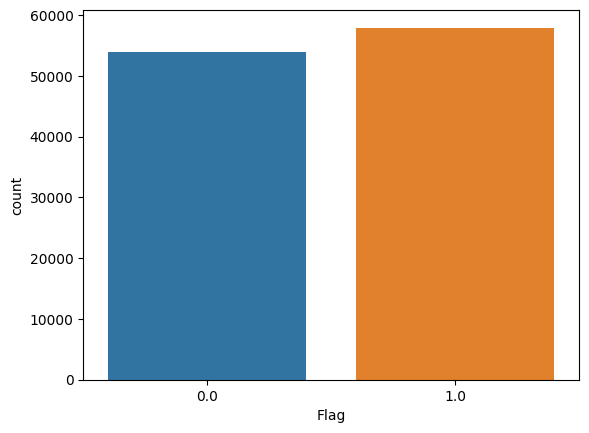

In [ ]:
sns.countplot(x = df['Flag'])

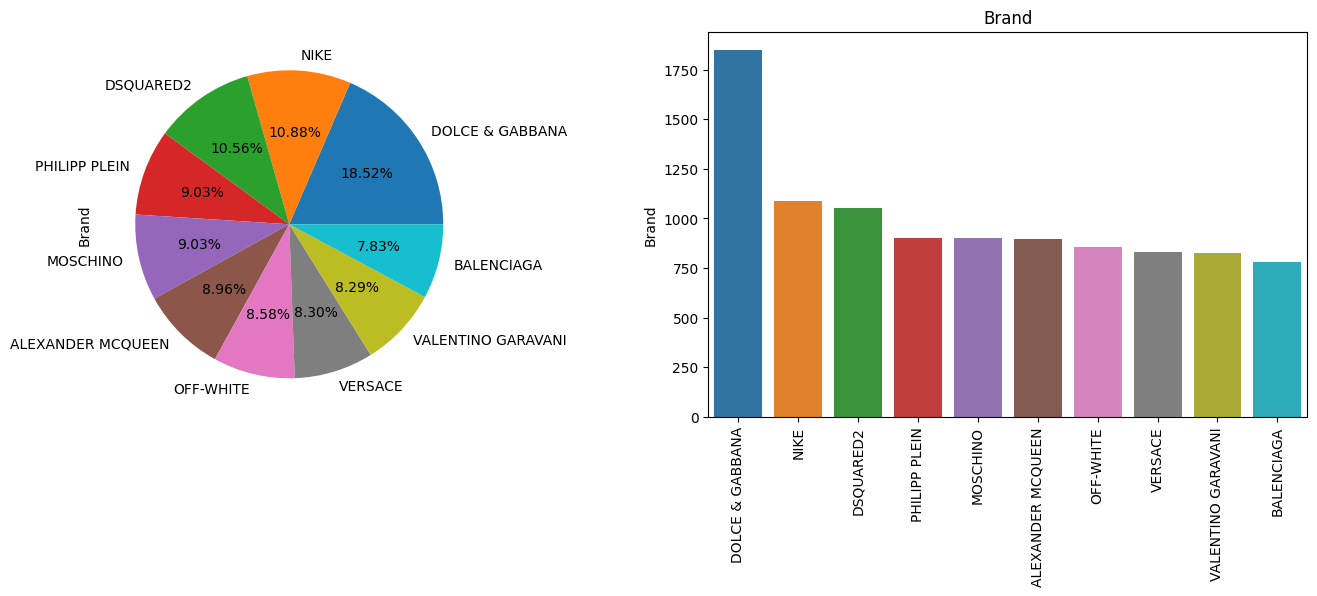

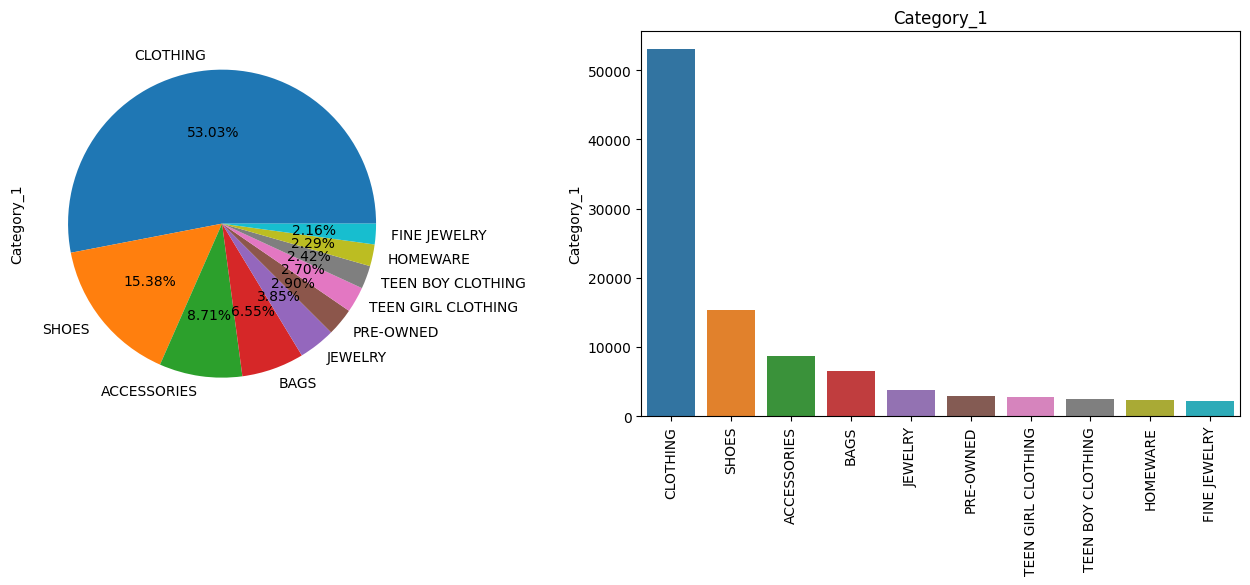

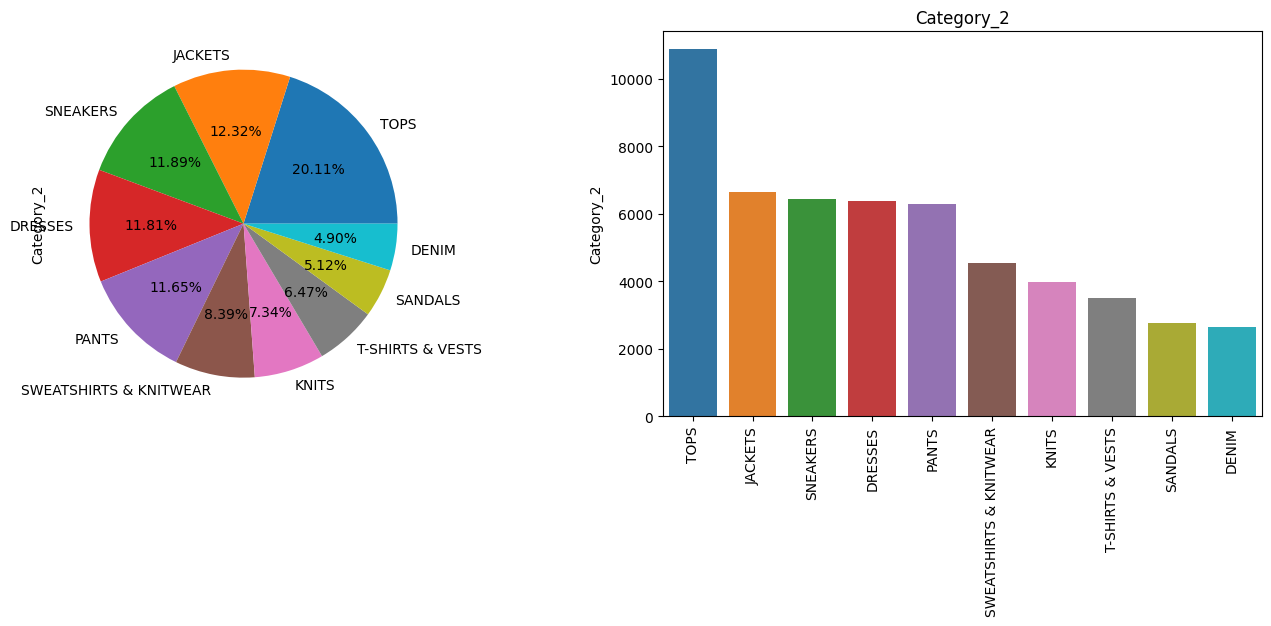

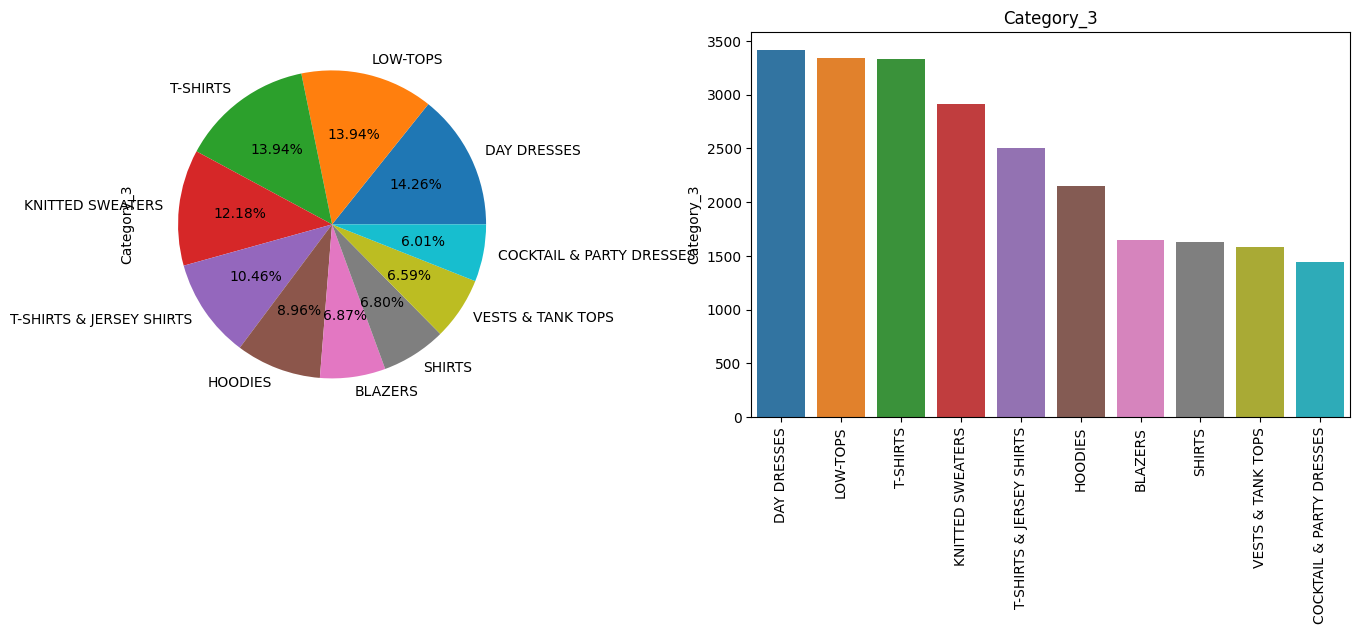

In [ ]:
for i in ['Brand','Category_1', 'Category_2','Category_3']:
    value = df[i].value_counts()[:10]
    fig, ax = plt.subplots(1, 2, figsize=(17, 5))
    sns.barplot(y = value, x = value.index)
    value.plot(kind='pie', autopct=lambda v: f'{v:.2f}%', ax=ax[0])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

In [ ]:
df['Discount_USD'] = df['Full_price_USD']-df['Discounted_price_USD']
df['Discount_pct'] = df['Discount_USD']*100/df['Full_price_USD']
cols.append('Discount_USD')
cols.append('Discount_pct')

In [ ]:
df['Discount_USD'].describe()

count    111911.000000
mean        118.294536
std         359.311466
min           0.000000
25%           0.000000
50%          10.000000
75%         120.000000
max       62472.000000
Name: Discount_USD, dtype: float64

In [ ]:
df['Discount_pct'] = df['Discount_pct'].round(2)

In [ ]:
df[df['Discount_USD'] == 62472][cols]

Brand Category_1    Category_2     Category_3  Product_code  \
11834  MAD PARIS    WATCHES  FINE WATCHES  DRESS WATCHES    16958353.0   

                                   Product_title  \
11834  customised Audemars Piguet Royal Oak 39mm   

                                                     URL  \
11834  http://www.farfetch.com/shopping/men/mad-paris...   

                                               image_URL  Full_price_USD  \
11834  https://cdn-images.farfetch-contents.com/16/95...        125000.0   

       Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
11834               62528.0        114995.4              57523.45   1.0   

       Discount_USD  Discount_pct  
11834       62472.0         49.98

# Top 10 Price Discount

In [ ]:
price = df.sort_values(by = ['Discount_USD'], ascending =  False)[cols]
price.head(10)

Brand    Category_1              Category_2  \
11834          MAD PARIS       WATCHES            FINE WATCHES   
61256          MAD PARIS       WATCHES            FINE WATCHES   
15620              MINDS       WATCHES         FASHION WATCHES   
47345              MINDS  FINE JEWELRY            FINE WATCHES   
105685       HATTON LABS       JEWELRY          FINE NECKLACES   
35565        HATTON LABS       JEWELRY          FINE BRACELETS   
55363      PHILIPP PLEIN      CLOTHING                 JACKETS   
6451              HERMÈS     PRE-OWNED          PRE-OWNED BAGS   
5215    CAROLINA HERRERA      CLOTHING                 DRESSES   
2288    CHANEL PRE-OWNED     PRE-OWNED  PRE-OWNED FINE WATCHES   

                     Category_3  Product_code  \
11834             DRESS WATCHES    16958353.0   
61256             DRESS WATCHES    16957572.0   
15620                       NaN    18898125.0   
47345                       NaN    18495970.0   
105685                      NaN    16089357.0   
35565                       NaN    16089304.0   
55363             BIKER JACKETS    14769190.0   
6451                        NaN    19384268.0   
5215            EVENING DRESSES    19702878.0   
2288    PRE-OWNED DRESS WATCHES    19476075.0   

                                            Product_title  \
11834           customised Audemars Piguet Royal Oak 39mm   
61256    customised Casablanca x MAD Paris Royal Oak 37mm   
15620   pre-owned customised Rolex Daytona Cosmograph ...   
47345                            customised Milgauss 40mm   
105685             18kt white gold white diamond necklace   
35565                     18kt white gold Tennis bracelet   
55363                          zebra leather biker jacket   
6451          1994 pre-owned Kelly Séllier 20 two-way bag   
5215                        sequin-embellished gown dress   
2288               1990-2000 pre-owned Camélia pearl 23mm   

                                                      URL  \
11834   http://www.farfetch.com/shopping/men/mad-paris...   
61256   http://www.farfetch.com/shopping/men/mad-paris...   
15620   http://www.farfetch.com/shopping/men/minds-pre...   
47345   http://www.farfetch.com/shopping/women/minds-c...   
105685  http://www.farfetch.com/shopping/men/hatton-la...   
35565   http://www.farfetch.com/shopping/men/hatton-la...   
55363   http://www.farfetch.com/shopping/women/philipp...   
6451    http://www.farfetch.com/shopping/women/hermes-...   
5215    http://www.farfetch.com/shopping/women/carolin...   
2288    http://www.farfetch.com/shopping/women/chanel-...   

                                                image_URL  Full_price_USD  \
11834   https://cdn-images.farfetch-contents.com/16/95...        125000.0   
61256   https://cdn-images.farfetch-contents.com/16/95...        125000.0   
15620   https://cdn-images.farfetch-contents.com/18/89...         80000.0   
47345   https://cdn-images.farfetch-contents.com/18/49...         50704.0   
105685  https://cdn-images.farfetch-contents.com/16/08...         28784.0   
35565   https://cdn-images.farfetch-contents.com/16/08...         28784.0   
55363   https://cdn-images.farfetch-contents.com/14/76...         18855.0   
6451    https://cdn-images.farfetch-contents.com/19/38...         72070.0   
5215    https://cdn-images.farfetch-contents.com/19/70...         13990.0   
2288    https://cdn-images.farfetch-contents.com/19/47...         69757.0   

        Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
11834                62528.0       114995.40              57523.45   1.0   
61256                87517.0       114995.40              80512.41   1.0   
15620                56017.0        73597.05              51533.57   1.0   
47345                35509.0        46645.81              32666.97   1.0   
105685               17294.0        26480.22              15909.84   1.0   
35565                17294.0        26480.22              15909.84   1.0   
55363                11335.0

# Top 10 Percentage Discount

In [ ]:
pct = df.sort_values(by = ['Discount_pct'], ascending =  False)[cols]
pct.head(10)

Brand            Category_1               Category_2  \
21162                NICHOLAS              CLOTHING                     TOPS   
46556                TOM WOOD                 SHOES                  SANDALS   
94173               JADE SWIM              CLOTHING                BEACHWEAR   
9684            DEIJI STUDIOS  LINGERIE & NIGHTWEAR               LOUNGEWEAR   
77580                  TERRY.              CLOTHING                     TOPS   
33901                 MARYSIA              CLOTHING                  DRESSES   
28462   OLIVIA MORRIS AT HOME                 SHOES                  SANDALS   
111638                GAUGE81            ACTIVEWEAR  PERFORMANCE ALL-IN-ONES   
106250                  LUSSO                 SHOES                 SLIPPERS   
21076                   KNWLS              CLOTHING                     TOPS   

                   Category_3  Product_code  \
21162                 BLOUSES    19232044.0   
46556                     NaN    16340791.0   
94173                 BIKINIS    17921149.0   
9684                      NaN    15775876.0   
77580       VESTS & TANK TOPS    17392901.0   
33901             DAY DRESSES    18663173.0   
28462                     NaN    17512979.0   
111638  PERFORMANCE JUMPSUITS    17013759.0   
106250                    NaN    18780576.0   
21076       VESTS & TANK TOPS    17616789.0   

                                 Product_title  \
21162                    Kiarni halterneck top   
46556         x Sukicoke Moto platform sandals   
94173              Expose thong bikini bottoms   
9684             square-toe shearling slippers   
77580   Passo towelling halterneck cropped top   
33901                  scallop-edge mini dress   
28462    x Brogger Bluebell knot-strap sandals   
111638               Yukon perfomance playsuit   
106250               Guru waffle-knit slippers   
21076      floral-print halterneck cropped top   

                                                      URL  \
21162   http://www.farfetch.com/shopping/women/nichola...   
46556   http://www.farfetch.com/shopping/women/tom-woo...   
94173   http://www.farfetch.com/shopping/women/jade-sw...   
9684    http://www.farfetch.com/shopping/women/deiji-s...   
77580   http://www.farfetch.com/shopping/women/terry-p...   
33901   http://www.farfetch.com/shopping/women/marysia...   
28462   http://www.farfetch.com/shopping/women/olivia-...   
111638  http://www.farfetch.com/shopping/women/gauge81...   
106250  http://www.farfetch.com/shopping/men/lusso-gur...   
21076   http://www.farfetch.com/shopping/women/knwls-f...   

                                                image_URL  Full_price_USD  \
21162   https://cdn-images.farfetch-contents.com/19/23...           295.0   
46556   https://cdn-images.farfetch-contents.com/16/34...           400.0   
94173   https://cdn-images.farfetch-contents.com/17/92...            80.0   
9684    https://cdn-images.farfetch-contents.com/15/77...           330.0   
77580   https://cdn-images.farfetch-contents.com/17/39...           150.0   
33901   https://cdn-images.farfetch-contents.com/18/66...           270.0   
28462   https://cdn-images.farfetch-contents.com/17/51...           373.0   
111638  https://cdn-images.farfetch-contents.com/17/01...           164.0   
106250  https://cdn-images.farfetch-contents.com/18/78...           238.0   
21076   https://cdn-images.farfetch-contents.com/17/61...           346.0   

        Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
21162                   59.0          271.38                 54.27   1.0   
46556                   80.0          367.98                 73.59   1.0   
94173                   16.0           73.59                 14.71   1.0   
9684                    66.0          303.58                 60.71   1.0   
77580                   30.0          137.99                 27.59   1.0   
33901                   54.0          248.39                 49.67   1.0   
28462                 

# Top 10 Expensive Items after Discount

In [ ]:
Expensive = df.sort_values(by = ['Discounted_price_USD'], ascending =  False)[cols]
Expensive.head(10)

Brand    Category_1              Category_2  \
60718        PATEK PHILIPPE     PRE-OWNED  PRE-OWNED FINE WATCHES   
74953                 ROLEX     PRE-OWNED  PRE-OWNED FINE WATCHES   
28901        H. MOSER & CIE     PRE-OWNED  PRE-OWNED FINE WATCHES   
39281   VACHERON CONSTANTIN     PRE-OWNED  PRE-OWNED FINE WATCHES   
58595       AUDEMARS PIGUET     PRE-OWNED  PRE-OWNED FINE WATCHES   
105857        RICHARD MILLE     PRE-OWNED       PRE-OWNED WATCHES   
39887                 KWIAT  FINE JEWELRY          FINE BRACELETS   
35555        PATEK PHILIPPE     PRE-OWNED  PRE-OWNED FINE WATCHES   
83849       AUDEMARS PIGUET     PRE-OWNED  PRE-OWNED FINE WATCHES   
87086        PATEK PHILIPPE     PRE-OWNED  PRE-OWNED FINE WATCHES   

                           Category_3  Product_code  \
60718         PRE-OWNED DRESS WATCHES    19582252.0   
74953         PRE-OWNED DRESS WATCHES    20073212.0   
28901         PRE-OWNED DRESS WATCHES    19417720.0   
39281         PRE-OWNED DRESS WATCHES    19504850.0   
58595         PRE-OWNED DRESS WATCHES    20327607.0   
105857                            NaN    19944730.0   
39887                             NaN    16640803.0   
35555         PRE-OWNED DRESS WATCHES    19333157.0   
83849   PRE-OWNED CHRONOGRAPH WATCHES    19956140.0   
87086         PRE-OWNED DRESS WATCHES    19414810.0   

                                            Product_title  \
60718             2017 pre-owned Grand Complications 41mm   
74953              2012 pre-owned Daytona Cosmograph 40mm   
28901   2020 pre-owned Streamliner Flyback Chronograph...   
39281   2022 pre-owned Historiques Cornes de Vache 195...   
58595                       2021 pre-owned Royal Oak 41mm   
105857                                       RM 035 watch   
39887   18kt white gold diamond Moonlight 15-row bracelet   
35555                             pre-owned Nautilus 43mm   
83849        2008 pre-owned Royal Oak Concept Carbon 44mm   
87086                      2019 pre-owned Nautilus 40.5mm   

                                                      URL  \
60718   http://www.farfetch.com/shopping/men/patek-phi...   
74953   http://www.farfetch.com/shopping/men/rolex-201...   
28901   http://www.farfetch.com/shopping/men/h-moser-c...   
39281   http://www.farfetch.com/shopping/men/vacheron-...   
58595   http://www.farfetch.com/shopping/men/audemars-...   
105857  http://www.farfetch.com/shopping/men/richard-m...   
39887   http://www.farfetch.com/shopping/women/kwiat-1...   
35555   http://www.farfetch.com/shopping/men/patek-phi...   
83849   http://www.farfetch.com/shopping/men/audemars-...   
87086   http://www.farfetch.com/shopping/men/patek-phi...   

                                                image_URL  Full_price_USD  \
60718   https://cdn-images.farfetch-contents.com/19/58...        795000.0   
74953   https://cdn-images.farfetch-contents.com/20/07...        425909.0   
28901   https://cdn-images.farfetch-contents.com/19/41...        415635.0   
39281   https://cdn-images.farfetch-contents.com/19/50...        313591.0   
58595   https://cdn-images.farfetch-contents.com/20/32...        299950.0   
105857  https://cdn-images.farfetch-contents.com/19/94...        289932.0   
39887   https://cdn-images.farfetch-contents.com/16/64...        237000.0   
35555   https://cdn-images.farfetch-contents.com/19/33...        220025.0   
83849   https://cdn-images.farfetch-contents.com/19/95...        179950.0   
87086   https://cdn-images.farfetch-contents.com/19/41...        159159.0   

        Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
60718               795000.0       731370.74             731370.74   0.0   
74953               425909.0       391820.60             391820.60   0.0   
28901               415635.0       382368.90             382368.90   0.0   
39281               313591.0       288492.18             288492.18   0.0   
58595               299950.0       275942.96             275942.96   0.0   
105857  

# Top 10 Cheap Items after Discount

In [ ]:
Cheap = df.sort_values(by = ['Discounted_price_USD'], ascending =  True)[cols]
Cheap.head(10)

Brand            Category_1        Category_2  \
79699        NEOM ORGANICS         BATH AND BODY  BODY MOISTURISER   
53000        NEOM ORGANICS         BATH AND BODY  BODY MOISTURISER   
103315         DORA LARSEN  LINGERIE & NIGHTWEAR           PANTIES   
53105            PLEASURES           ACCESSORIES        FACE MASKS   
107195         DUSKII GIRL        GIRLS CLOTHING          SWIMWEAR   
93924   HUCKLEBONES LONDON     GIRLS ACCESSORIES  HAIR ACCESSORIES   
10223           PAUL SMITH     UNDERWEAR & SOCKS   BRIEFS & BOXERS   
2816             JADE SWIM              CLOTHING         BEACHWEAR   
11142          NUBIAN SKIN  LINGERIE & NIGHTWEAR           PANTIES   
63324          NUBIAN SKIN  LINGERIE & NIGHTWEAR           PANTIES   

                     Category_3  Product_code  \
79699                       NaN    18795862.0   
53000                       NaN    18796713.0   
103315                      NaN    19403569.0   
53105                       NaN    16027262.0   
107195       BIKINIS & TANKINIS    13670167.0   
93924   HAIR BANDS & HEAD BANDS    15920214.0   
10223                       NaN    18800687.0   
2816                    BIKINIS    17118392.0   
11142                       NaN    18728586.0   
63324                       NaN    18728587.0   

                             Product_title  \
79699                  Uplifting hand balm   
53000        Perfect Night Sleep hand balm   
103315             Pixie Clean tulle thong   
53105                 Holy print face mask   
107195                 Anise bikini bottom   
93924          bow-detail slip-on headband   
10223   stripe-print logo-waistband boxers   
2816               low-rise bikini bottoms   
11142    tulle-panel low-rise thong 3-pack   
63324    tulle-panel low-rise thong 3-pack   

                                                      URL  \
79699   http://www.farfetch.com/shopping/beauty/neom-o...   
53000   http://www.farfetch.com/shopping/beauty/neom-o...   
103315  http://www.farfetch.com/shopping/women/dora-la...   
53105   http://www.farfetch.com/shopping/men/pleasures...   
107195  http://www.farfetch.com/shopping/kids/duskii-g...   
93924   http://www.farfetch.com/shopping/kids/hucklebo...   
10223   http://www.farfetch.com/shopping/men/paul-smit...   
2816    http://www.farfetch.com/shopping/women/jade-sw...   
11142   http://www.farfetch.com/shopping/women/nubian-...   
63324   http://www.farfetch.com/shopping/women/nubian-...   

                                                image_URL  Full_price_USD  \
79699   https://cdn-images.farfetch-contents.com/18/79...            10.0   
53000   https://cdn-images.farfetch-contents.com/18/79...            10.0   
103315  https://cdn-images.farfetch-contents.com/19/40...            25.0   
53105   https://cdn-images.farfetch-contents.com/16/02...            45.0   
107195  https://cdn-images.farfetch-contents.com/13/67...            29.0   
93924   https://cdn-images.farfetch-contents.com/15/92...            38.0   
10223   https://cdn-images.farfetch-contents.com/18/80...            30.0   
2816    https://cdn-images.farfetch-contents.com/17/11...            50.0   
11142   https://cdn-images.farfetch-contents.com/18/72...            30.0   
63324   https://cdn-images.farfetch-contents.com/18/72...            30.0   

        Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
79699                   10.0            9.19                  9.19   0.0   
53000                   10.0            9.19                  9.19   0.0   
103315                  13.0           22.99                 11.95   1.0   
53105                   13.0           41.39                 11.95   1.0   
107195                  14.0           26.67                 12.87   1.0   
93924                   15.0           34.95                 13.79   1.0   
10223                   15.0           27.59                 13.79   1.0   
2816                    15.0           45.99                 13.79   1.0   

# Find Any Category Specific Results

In [ ]:
cat = pd.melt(df, value_vars =['Brand','Category_1', 'Category_2', 'Category_3']).drop_duplicates().reset_index()
cat

index    variable             value
0          0       Brand   GUCCI PRE-OWNED
1          1       Brand            RAMAEL
2          2       Brand         OFF-WHITE
3          3       Brand           LARDINI
4          4       Brand         FERRAGAMO
...      ...         ...               ...
3580  414729  Category_3   GIRLS ROLL NECK
3581  415895  Category_3           PRIMERS
3582  417630  Category_3          LEOTARDS
3583  423270  Category_3  FAUX FUR JACKETS
3584  432333  Category_3    BOYS DUNGAREES

[3585 rows x 3 columns]

In [ ]:
colu = ['Brand', 'Discount_USD','Discount_pct','Category_1','Category_2','Category_3', 'Product_code', 'Product_title',
        'Full_price_USD', 'Discounted_price_USD', 'Full_price_EUR', 'Discounted_price_EUR', 'Flag']

# Defining function to find best deal for Discount Price, Discount Percent, Expensive Items, and Cheap Items

In [ ]:
def discount_price(a,n):
    col = cat.loc[cat['value'] == a]['variable'].values[0]
    df_price_discount = price.loc[price[col] == a].head(n).reset_index()
    for i in range(n):
        image = io.imread(df_price_discount['image_URL'][i])
        plt.imshow(image)
        plt.axis('off')
        plt.title(df_price_discount['Brand'][i]+' - $'+ str(df_price_discount['Discount_USD'][i]) + ' OFF')
        plt.show()
        print(df_price_discount[colu][i:i+1].T)
        print(df_price_discount['URL'][i])
        print('*'*50, '\n')

def discount_pct(a,n):
    col = cat.loc[cat['value'] == a]['variable'].values[0]
    df_pct_discount = pct.loc[pct[col] == a].head(n).reset_index()
    for i in range(n):
        image = io.imread(df_pct_discount['image_URL'][i])
        plt.imshow(image)
        plt.axis('off')
        plt.title(df_pct_discount['Brand'][i] +' - '+ str(df_pct_discount['Discount_pct'][i]) + '% OFF')
        plt.show()
        print(df_pct_discount[colu][i:i+1].T)
        print(df_pct_discount['URL'][i])
        print('*'*50, '\n')

def Expensive_price(a,n):
    col = cat.loc[cat['value'] == a]['variable'].values[0]
    Exp = Expensive.loc[pct[col] == a].head(n).reset_index()
    for i in range(n):
        image = io.imread(Exp['image_URL'][i])
        plt.imshow(image)
        plt.axis('off')
        plt.title(Exp['Brand'][i] +' - '+ str(Exp['Discount_pct'][i]) + '% OFF')
        plt.show()
        print(Exp[colu][i:i+1].T)
        print(Exp['URL'][i])
        print('*'*50, '\n')

def Cheap_price(a,n):
    col = cat.loc[cat['value'] == a]['variable'].values[0]
    Chp = Cheap.loc[pct[col] == a].head(n).reset_index()
    for i in range(n):
        image = io.imread(Chp['image_URL'][i])
        plt.imshow(image)
        plt.axis('off')
        plt.title(Chp['Brand'][i] +' - '+ str(Chp['Discount_pct'][i]) + '% OFF')
        plt.show()
        print(Chp[colu][i:i+1].T)
        print(Chp['URL'][i])
        print('*'*50, '\n')

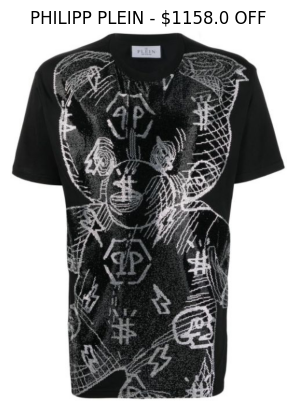

                                                  0
Brand                                 PHILIPP PLEIN
Discount_USD                                 1158.0
Discount_pct                                   60.0
Category_1                                 CLOTHING
Category_2                         T-SHIRTS & VESTS
Category_3                                 T-SHIRTS
Product_code                             18558875.0
Product_title         Teddy Bear-print logo T-shirt
Full_price_USD                               1930.0
Discounted_price_USD                          772.0
Full_price_EUR                              1775.52
Discounted_price_EUR                         710.21
Flag                                            1.0
http://www.farfetch.com/shopping/men/philipp-plein-teddy-bear-print-logo-t-shirt-item-18558875.aspx?storeid=11837
************************************************** 



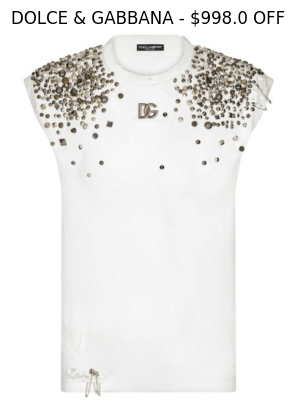

                                                        1
Brand                                     DOLCE & GABBANA
Discount_USD                                        998.0
Discount_pct                                         40.0
Category_1                                       CLOTHING
Category_2                               T-SHIRTS & VESTS
Category_3                                       T-SHIRTS
Product_code                                   18665764.0
Product_title         stud-embellished sleeveless T-shirt
Full_price_USD                                     2495.0
Discounted_price_USD                               1497.0
Full_price_EUR                                     2295.3
Discounted_price_EUR                              1377.18
Flag                                                  1.0
http://www.farfetch.com/shopping/men/dolce-gabbana-stud-embellished-sleeveless-t-shirt-item-18665764.aspx?storeid=13097
************************************************** 



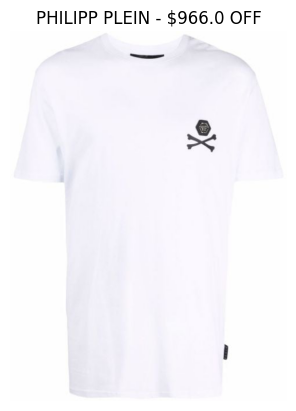

                                           2
Brand                          PHILIPP PLEIN
Discount_USD                           966.0
Discount_pct                           59.81
Category_1                          CLOTHING
Category_2                  T-SHIRTS & VESTS
Category_3                          T-SHIRTS
Product_code                      17351864.0
Product_title         skeleton print T-shirt
Full_price_USD                        1615.0
Discounted_price_USD                   649.0
Full_price_EUR                       1485.74
Discounted_price_EUR                  597.05
Flag                                     1.0
http://www.farfetch.com/shopping/men/philipp-plein-skeleton-print-t-shirt-item-17351864.aspx?storeid=12556
************************************************** 



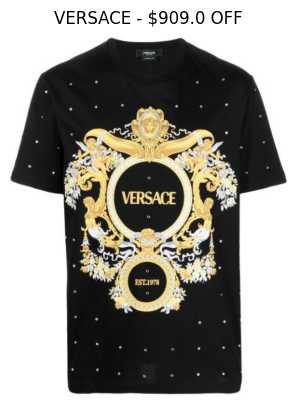

                                                       3
Brand                                            VERSACE
Discount_USD                                       909.0
Discount_pct                                       49.81
Category_1                                      CLOTHING
Category_2                              T-SHIRTS & VESTS
Category_3                                      T-SHIRTS
Product_code                                  18835398.0
Product_title         Baroque Crystal Grid-print T-shirt
Full_price_USD                                    1825.0
Discounted_price_USD                               916.0
Full_price_EUR                                   1678.93
Discounted_price_EUR                              842.68
Flag                                                 1.0
http://www.farfetch.com/shopping/men/versace-baroque-crystal-grid-print-t-shirt-item-18835398.aspx?storeid=11922
************************************************** 



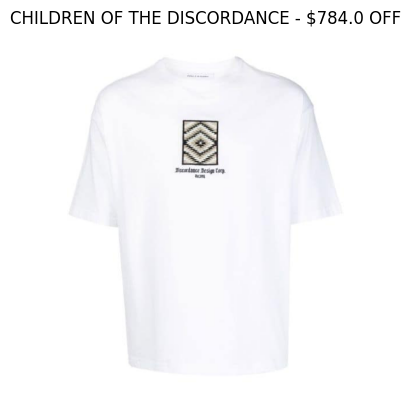

                                                4
Brand                 CHILDREN OF THE DISCORDANCE
Discount_USD                                784.0
Discount_pct                                67.07
Category_1                               CLOTHING
Category_2                       T-SHIRTS & VESTS
Category_3                               T-SHIRTS
Product_code                           18521322.0
Product_title                  logo-print T-shirt
Full_price_USD                             1169.0
Discounted_price_USD                        385.0
Full_price_EUR                            1075.43
Discounted_price_EUR                       354.18
Flag                                          1.0
http://www.farfetch.com/shopping/men/children-of-the-discordance-logo-print-t-shirt-item-18521322.aspx?storeid=12638
************************************************** 



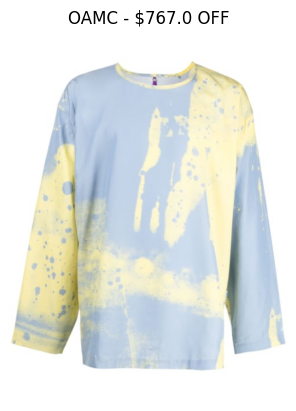

                                                     5
Brand                                             OAMC
Discount_USD                                     767.0
Discount_pct                                     39.84
Category_1                                    CLOTHING
Category_2                            T-SHIRTS & VESTS
Category_3                                    T-SHIRTS
Product_code                                19867372.0
Product_title         waistband-detail wide-sleeve top
Full_price_USD                                  1925.0
Discounted_price_USD                            1158.0
Full_price_EUR                                 1770.92
Discounted_price_EUR                           1065.31
Flag                                               1.0
http://www.farfetch.com/shopping/men/oamc-waistband-detail-wide-sleeve-top-item-19867372.aspx?storeid=10125
************************************************** 



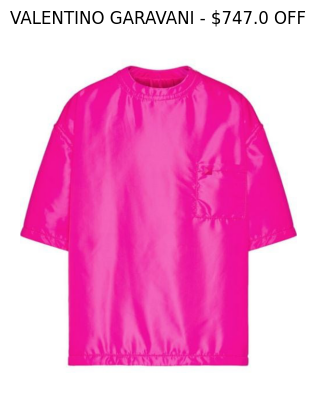

                                                  6
Brand                            VALENTINO GARAVANI
Discount_USD                                  747.0
Discount_pct                                  59.76
Category_1                                 CLOTHING
Category_2                         T-SHIRTS & VESTS
Category_3                                 T-SHIRTS
Product_code                             18658233.0
Product_title         stud-detail crew neck T-shirt
Full_price_USD                               1250.0
Discounted_price_USD                          503.0
Full_price_EUR                              1149.95
Discounted_price_EUR                         462.74
Flag                                            1.0
http://www.farfetch.com/shopping/men/valentino-garavani-stud-detail-crew-neck-t-shirt-item-18658233.aspx?storeid=9359
************************************************** 



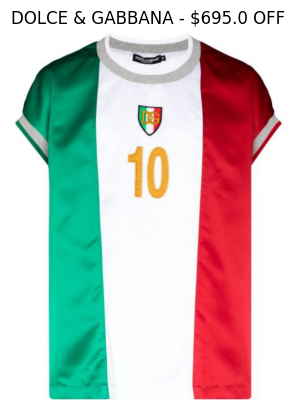

                                                     7
Brand                                  DOLCE & GABBANA
Discount_USD                                     695.0
Discount_pct                                     49.82
Category_1                                    CLOTHING
Category_2                            T-SHIRTS & VESTS
Category_3                                    T-SHIRTS
Product_code                                17877923.0
Product_title         logo-print short-sleeved T-shirt
Full_price_USD                                  1395.0
Discounted_price_USD                             700.0
Full_price_EUR                                 1283.34
Discounted_price_EUR                            643.97
Flag                                               1.0
http://www.farfetch.com/shopping/men/dolce-gabbana-logo-print-short-sleeved-t-shirt-item-17877923.aspx?storeid=9462
************************************************** 



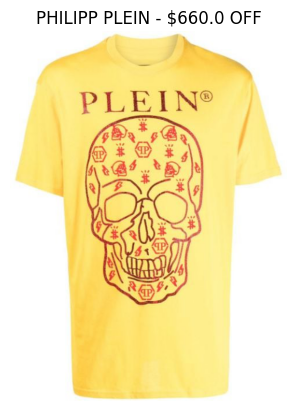

                                               8
Brand                              PHILIPP PLEIN
Discount_USD                               660.0
Discount_pct                                60.0
Category_1                              CLOTHING
Category_2                      T-SHIRTS & VESTS
Category_3                              T-SHIRTS
Product_code                          18496885.0
Product_title         skull-print detail T-shirt
Full_price_USD                            1100.0
Discounted_price_USD                       440.0
Full_price_EUR                           1011.95
Discounted_price_EUR                      404.78
Flag                                         1.0
http://www.farfetch.com/shopping/men/philipp-plein-skull-print-detail-t-shirt-item-18496885.aspx?storeid=11837
************************************************** 



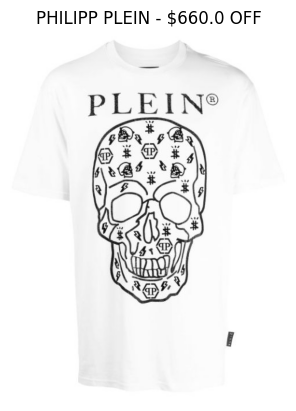

                                                   9
Brand                                  PHILIPP PLEIN
Discount_USD                                   660.0
Discount_pct                                    60.0
Category_1                                  CLOTHING
Category_2                          T-SHIRTS & VESTS
Category_3                                  T-SHIRTS
Product_code                              18495849.0
Product_title         skull-print round neck T-shirt
Full_price_USD                                1100.0
Discounted_price_USD                           440.0
Full_price_EUR                               1011.95
Discounted_price_EUR                          404.78
Flag                                             1.0
http://www.farfetch.com/shopping/men/philipp-plein-skull-print-round-neck-t-shirt-item-18495849.aspx?storeid=11837
************************************************** 



In [ ]:
discount_price('T-SHIRTS',10)

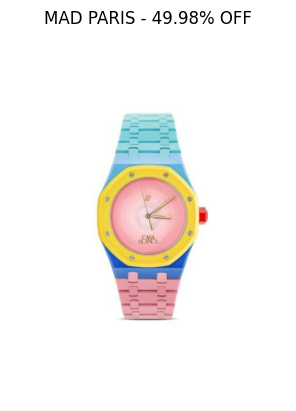

                                                              0
Brand                                                 MAD PARIS
Discount_USD                                            62472.0
Discount_pct                                              49.98
Category_1                                              WATCHES
Category_2                                         FINE WATCHES
Category_3                                        DRESS WATCHES
Product_code                                         16958353.0
Product_title         customised Audemars Piguet Royal Oak 39mm
Full_price_USD                                         125000.0
Discounted_price_USD                                    62528.0
Full_price_EUR                                         114995.4
Discounted_price_EUR                                   57523.45
Flag                                                        1.0
http://www.farfetch.com/shopping/men/mad-paris-customised-audemars-piguet-royal-oak-39mm-item-16958353.a

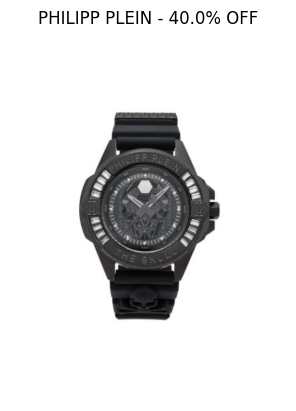

                                       1
Brand                      PHILIPP PLEIN
Discount_USD                       260.0
Discount_pct                        40.0
Category_1                       WATCHES
Category_2               FASHION WATCHES
Category_3                           NaN
Product_code                  19015482.0
Product_title         $kull quartz 43mm 
Full_price_USD                     650.0
Discounted_price_USD               390.0
Full_price_EUR                    597.97
Discounted_price_EUR              358.78
Flag                                 1.0
http://www.farfetch.com/shopping/men/philipp-plein-kull-quartz-43mm-item-19015482.aspx?storeid=11837
************************************************** 



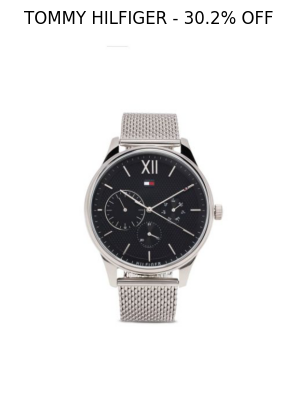

                                                 2
Brand                               TOMMY HILFIGER
Discount_USD                                  74.0
Discount_pct                                  30.2
Category_1                                 WATCHES
Category_2                         FASHION WATCHES
Category_3                                     NaN
Product_code                            18753552.0
Product_title         mesh-bracelet stainless 44mm
Full_price_USD                               245.0
Discounted_price_USD                         171.0
Full_price_EUR                              225.39
Discounted_price_EUR                        157.31
Flag                                           1.0
http://www.farfetch.com/shopping/men/tommy-hilfiger-mesh-bracelet-stainless-44mm-item-18753552.aspx?storeid=13539
************************************************** 



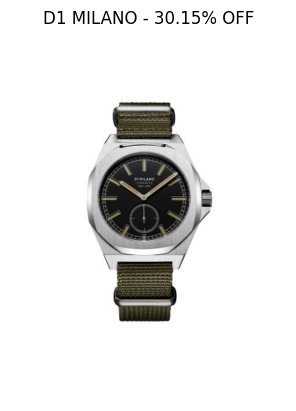

                                       3
Brand                          D1 MILANO
Discount_USD                        98.0
Discount_pct                       30.15
Category_1                       WATCHES
Category_2                       WATCHES
Category_3                           NaN
Product_code                  15548104.0
Product_title         Commando Tank 38mm
Full_price_USD                     325.0
Discounted_price_USD               227.0
Full_price_EUR                    298.98
Discounted_price_EUR              208.83
Flag                                 1.0
http://www.farfetch.com/shopping/men/d1-milano-commando-tank-38mm-item-15548104.aspx?storeid=10897
************************************************** 



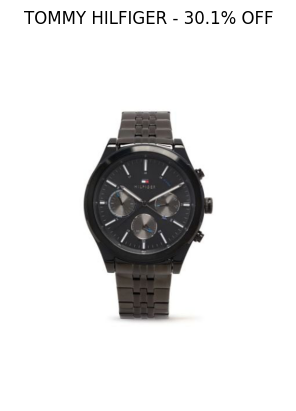

                                                4
Brand                              TOMMY HILFIGER
Discount_USD                                 90.0
Discount_pct                                 30.1
Category_1                                WATCHES
Category_2                        FASHION WATCHES
Category_3                                    NaN
Product_code                           18753555.0
Product_title         quartz stainless steel 44mm
Full_price_USD                              299.0
Discounted_price_USD                        209.0
Full_price_EUR                             275.06
Discounted_price_EUR                       192.27
Flag                                          1.0
http://www.farfetch.com/shopping/men/tommy-hilfiger-quartz-stainless-steel-44mm-item-18753555.aspx?storeid=13539
************************************************** 



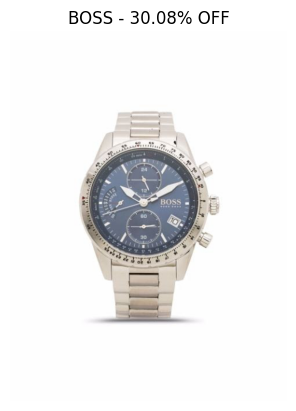

                                                   5
Brand                                           BOSS
Discount_USD                                   120.0
Discount_pct                                   30.08
Category_1                                   WATCHES
Category_2                           FASHION WATCHES
Category_3                                       NaN
Product_code                              17024377.0
Product_title         Pilot Edition Chronograph 44mm
Full_price_USD                                 399.0
Discounted_price_USD                           279.0
Full_price_EUR                                367.06
Discounted_price_EUR                          256.66
Flag                                             1.0
http://www.farfetch.com/shopping/men/boss-pilot-edition-chronograph-44mm-item-17024377.aspx?storeid=13539
************************************************** 



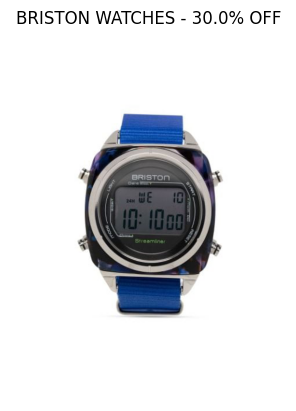

                                             6
Brand                          BRISTON WATCHES
Discount_USD                              45.0
Discount_pct                              30.0
Category_1                             WATCHES
Category_2                             WATCHES
Category_3                                 NaN
Product_code                        18375786.0
Product_title         Streamliner Digital 34mm
Full_price_USD                           150.0
Discounted_price_USD                     105.0
Full_price_EUR                          137.99
Discounted_price_EUR                     96.59
Flag                                       1.0
http://www.farfetch.com/shopping/men/briston-watches-streamliner-digital-34mm-item-18375786.aspx?storeid=12395
************************************************** 



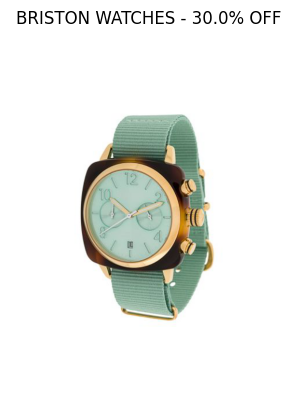

                                                   7
Brand                                BRISTON WATCHES
Discount_USD                                   105.0
Discount_pct                                    30.0
Category_1                                   WATCHES
Category_2                                   WATCHES
Category_3                                       NaN
Product_code                              14667946.0
Product_title         Clubmaster Classic Chrono 40mm
Full_price_USD                                 350.0
Discounted_price_USD                           245.0
Full_price_EUR                                321.98
Discounted_price_EUR                          225.39
Flag                                             1.0
http://www.farfetch.com/shopping/men/briston-watches-clubmaster-classic-chrono-40mm-item-14667946.aspx?storeid=12395
************************************************** 



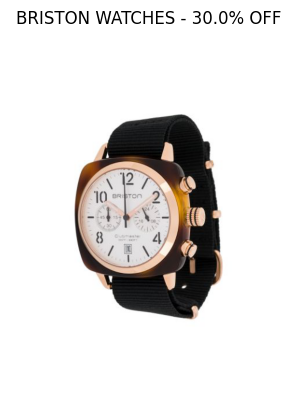

                                            8
Brand                         BRISTON WATCHES
Discount_USD                            105.0
Discount_pct                             30.0
Category_1                            WATCHES
Category_2                            WATCHES
Category_3                                NaN
Product_code                       14667936.0
Product_title         Clubmaster Classic 40mm
Full_price_USD                          350.0
Discounted_price_USD                    245.0
Full_price_EUR                         321.98
Discounted_price_EUR                   225.39
Flag                                      1.0
http://www.farfetch.com/shopping/men/briston-watches-clubmaster-classic-40mm-item-14667936.aspx?storeid=12395
************************************************** 



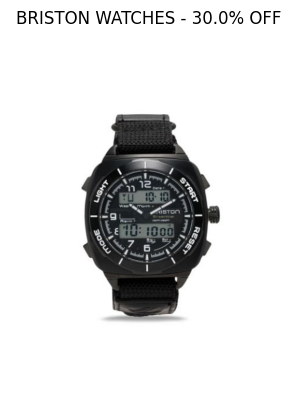

                                                9
Brand                             BRISTON WATCHES
Discount_USD                                114.0
Discount_pct                                 30.0
Category_1                                WATCHES
Category_2                                WATCHES
Category_3                                    NaN
Product_code                           18375790.0
Product_title         Streamliner Ad-Venture 44mm
Full_price_USD                              380.0
Discounted_price_USD                        266.0
Full_price_EUR                             349.58
Discounted_price_EUR                       244.71
Flag                                          1.0
http://www.farfetch.com/shopping/men/briston-watches-streamliner-ad-venture-44mm-item-18375790.aspx?storeid=12395
************************************************** 



In [ ]:
discount_pct('WATCHES',10)

In [ ]:
df.columns

Index(['Website_name', 'Competence_date', 'Country_code', 'Currency_Code',
       'Brand', 'Category_1', 'Category_2', 'Category_3', 'Product_code',
       'Product_title', 'URL', 'image_URL', 'Full_price_USD',
       'Discounted_price_USD', 'Full_price_EUR', 'Discounted_price_EUR',
       'Flag', 'Discount_USD', 'Discount_pct'],
      dtype='object')

In [ ]:
Catalog = pd.DataFrame()
for i in ['Brand', 'Category_1', 'Category_2', 'Category_3']:
    Catalog[i] = df[i].value_counts().index[:9]

In [ ]:
Catalog

Brand          Category_1              Category_2  \
0     DOLCE & GABBANA            CLOTHING                    TOPS   
1                NIKE               SHOES                 JACKETS   
2           DSQUARED2         ACCESSORIES                SNEAKERS   
3       PHILIPP PLEIN                BAGS                 DRESSES   
4            MOSCHINO             JEWELRY                   PANTS   
5   ALEXANDER MCQUEEN           PRE-OWNED  SWEATSHIRTS & KNITWEAR   
6           OFF-WHITE  TEEN GIRL CLOTHING                   KNITS   
7             VERSACE   TEEN BOY CLOTHING        T-SHIRTS & VESTS   
8  VALENTINO GARAVANI            HOMEWARE                 SANDALS   

                 Category_3  
0               DAY DRESSES  
1                  LOW-TOPS  
2                  T-SHIRTS  
3          KNITTED SWEATERS  
4  T-SHIRTS & JERSEY SHIRTS  
5                   HOODIES  
6                   BLAZERS  
7                    SHIRTS  
8         VESTS & TANK TOPS

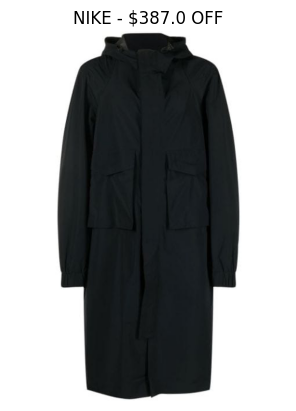

                                         0
Brand                                 NIKE
Discount_USD                         387.0
Discount_pct                         49.94
Category_1                        CLOTHING
Category_2                           COATS
Category_3                          PARKAS
Product_code                    19102417.0
Product_title         Esc woven parka coat
Full_price_USD                       775.0
Discounted_price_USD                 388.0
Full_price_EUR                      712.97
Discounted_price_EUR                356.94
Flag                                   1.0
http://www.farfetch.com/shopping/men/nike-esc-woven-parka-coat-item-19102417.aspx?storeid=13537
************************************************** 



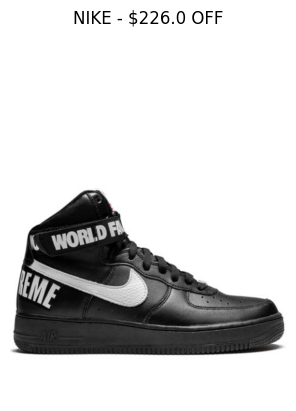

                                                             1
Brand                                                     NIKE
Discount_USD                                             226.0
Discount_pct                                             20.02
Category_1                                               SHOES
Category_2                                            SNEAKERS
Category_3                                            LOW-TOPS
Product_code                                        14147512.0
Product_title         x Supreme Air Force 1 high-top sneakers 
Full_price_USD                                          1129.0
Discounted_price_USD                                     903.0
Full_price_EUR                                         1038.63
Discounted_price_EUR                                    830.72
Flag                                                       1.0
http://www.farfetch.com/shopping/men/nike-x-supreme-air-force-1-high-top-sneakers-item-14147512.aspx?storeid=11218
***

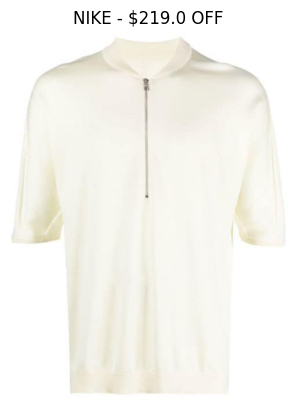

                                            2
Brand                                    NIKE
Discount_USD                            219.0
Discount_pct                            49.77
Category_1                           CLOTHING
Category_2             SWEATSHIRTS & KNITWEAR
Category_3                   KNITTED SWEATERS
Product_code                       19101627.0
Product_title         zip-up knit polo shirt 
Full_price_USD                          440.0
Discounted_price_USD                    221.0
Full_price_EUR                         404.78
Discounted_price_EUR                   203.31
Flag                                      1.0
http://www.farfetch.com/shopping/men/nike-zip-up-knit-polo-shirt-item-19101627.aspx?storeid=13537
************************************************** 



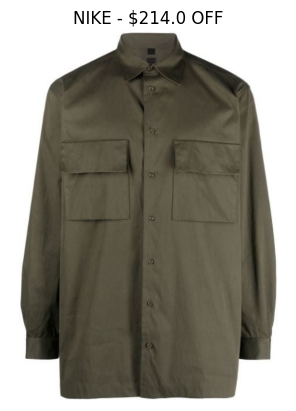

                                     3
Brand                             NIKE
Discount_USD                     214.0
Discount_pct                     49.77
Category_1                    CLOTHING
Category_2                      SHIRTS
Category_3                         NaN
Product_code                19102414.0
Product_title         button-up shirt 
Full_price_USD                   430.0
Discounted_price_USD             216.0
Full_price_EUR                  395.58
Discounted_price_EUR            198.71
Flag                               1.0
http://www.farfetch.com/shopping/men/nike-button-up-shirt-item-19102414.aspx?storeid=13537
************************************************** 



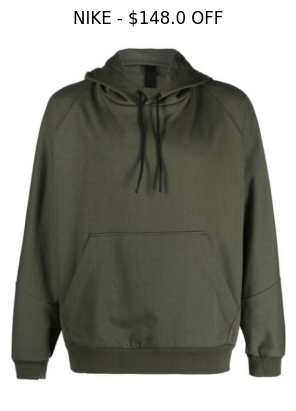

                                                 4
Brand                                         NIKE
Discount_USD                                 148.0
Discount_pct                                  40.0
Category_1                                CLOTHING
Category_2                  SWEATSHIRTS & KNITWEAR
Category_3                                 HOODIES
Product_code                            19101633.0
Product_title         ESC cotton drawstring hoodie
Full_price_USD                               370.0
Discounted_price_USD                         222.0
Full_price_EUR                              340.38
Discounted_price_EUR                        204.23
Flag                                           1.0
http://www.farfetch.com/shopping/men/nike-esc-cotton-drawstring-hoodie-item-19101633.aspx?storeid=13537
************************************************** 



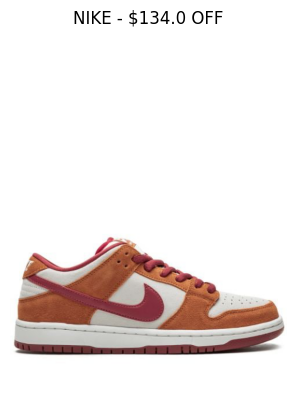

                                             5
Brand                                     NIKE
Discount_USD                             134.0
Discount_pct                              20.0
Category_1                               SHOES
Category_2                            SNEAKERS
Category_3                            LOW-TOPS
Product_code                        14619243.0
Product_title         SB Dunk Low Pro sneakers
Full_price_USD                           670.0
Discounted_price_USD                     536.0
Full_price_EUR                          616.37
Discounted_price_EUR                     493.1
Flag                                       1.0
http://www.farfetch.com/shopping/men/nike-sb-dunk-low-pro-sneakers-item-14619243.aspx?storeid=11218
************************************************** 



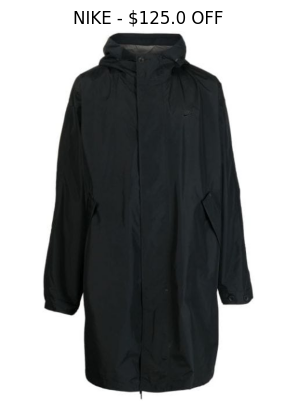

                                                6
Brand                                        NIKE
Discount_USD                                125.0
Discount_pct                                26.32
Category_1                               CLOTHING
Category_2                                  COATS
Category_3                              RAINCOATS
Product_code                           19345932.0
Product_title         Storm-FIT hooded parka coat
Full_price_USD                              475.0
Discounted_price_USD                        350.0
Full_price_EUR                             436.98
Discounted_price_EUR                       321.98
Flag                                          1.0
http://www.farfetch.com/shopping/men/nike-storm-fit-hooded-parka-coat-item-19345932.aspx?storeid=13305
************************************************** 



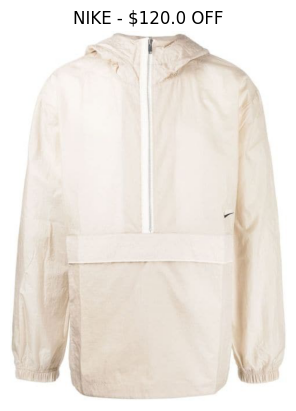

                                                         7
Brand                                                 NIKE
Discount_USD                                         120.0
Discount_pct                                          50.0
Category_1                                        CLOTHING
Category_2                                         JACKETS
Category_3                    SPORT JACKETS & WINDBREAKERS
Product_code                                    19088145.0
Product_title         NSW Style Essentials pullover jacket
Full_price_USD                                       240.0
Discounted_price_USD                                 120.0
Full_price_EUR                                      220.79
Discounted_price_EUR                                110.39
Flag                                                   1.0
http://www.farfetch.com/shopping/men/nike-nsw-style-essentials-pullover-jacket-item-19088145.aspx?storeid=12790
************************************************** 



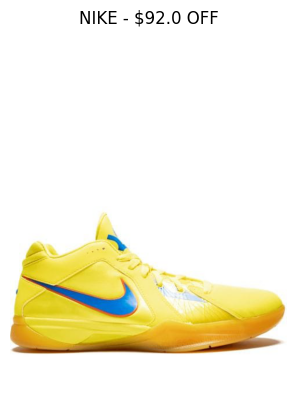

                                                  8
Brand                                          NIKE
Discount_USD                                   92.0
Discount_pct                                  20.04
Category_1                                    SHOES
Category_2                                 SNEAKERS
Category_3                                 LOW-TOPS
Product_code                             14273796.0
Product_title         Zoom KD 3 Christmas" sneakers
Full_price_USD                                459.0
Discounted_price_USD                          367.0
Full_price_EUR                               422.26
Discounted_price_EUR                         337.62
Flag                                            1.0
http://www.farfetch.com/shopping/men/nike-zoom-kd-3-christmas-sneakers-item-14273796.aspx?storeid=11218
************************************************** 



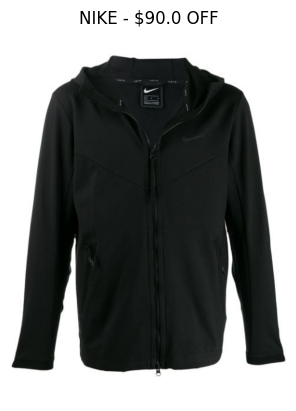

                                         9
Brand                                 NIKE
Discount_USD                          90.0
Discount_pct                          50.0
Category_1                        CLOTHING
Category_2                         JACKETS
Category_3                  HOODED JACKETS
Product_code                    14462051.0
Product_title         hooded jersey jacket
Full_price_USD                       180.0
Discounted_price_USD                  90.0
Full_price_EUR                      165.59
Discounted_price_EUR                 82.79
Flag                                   1.0
http://www.farfetch.com/shopping/men/nike-hooded-jersey-jacket-item-14462051.aspx?storeid=12790
************************************************** 



In [ ]:
discount_price('NIKE',10)

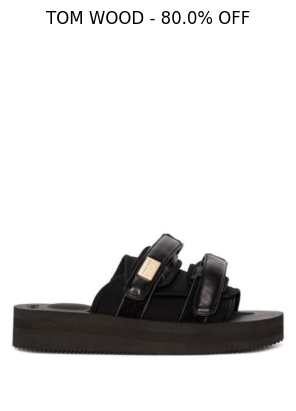

                                                     0
Brand                                         TOM WOOD
Discount_USD                                     320.0
Discount_pct                                      80.0
Category_1                                       SHOES
Category_2                                     SANDALS
Category_3                                         NaN
Product_code                                16340791.0
Product_title         x Sukicoke Moto platform sandals
Full_price_USD                                   400.0
Discounted_price_USD                              80.0
Full_price_EUR                                  367.98
Discounted_price_EUR                             73.59
Flag                                               1.0
http://www.farfetch.com/shopping/women/tom-wood-x-sukicoke-moto-platform-sandals-item-16340791.aspx?storeid=13537
************************************************** 



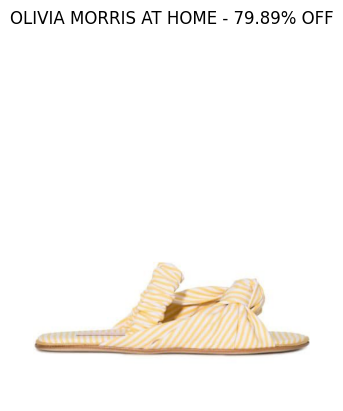

                                                          1
Brand                                 OLIVIA MORRIS AT HOME
Discount_USD                                          298.0
Discount_pct                                          79.89
Category_1                                            SHOES
Category_2                                          SANDALS
Category_3                                              NaN
Product_code                                     17512979.0
Product_title         x Brogger Bluebell knot-strap sandals
Full_price_USD                                        373.0
Discounted_price_USD                                   75.0
Full_price_EUR                                       343.14
Discounted_price_EUR                                  68.99
Flag                                                    1.0
http://www.farfetch.com/shopping/women/olivia-morris-at-home-x-brogger-bluebell-knot-strap-sandals-item-17512979.aspx?storeid=13537
****************************

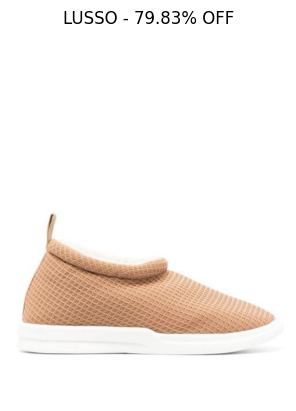

                                              2
Brand                                     LUSSO
Discount_USD                              190.0
Discount_pct                              79.83
Category_1                                SHOES
Category_2                             SLIPPERS
Category_3                                  NaN
Product_code                         18780576.0
Product_title         Guru waffle-knit slippers
Full_price_USD                            238.0
Discounted_price_USD                       48.0
Full_price_EUR                           218.95
Discounted_price_EUR                      44.15
Flag                                        1.0
http://www.farfetch.com/shopping/men/lusso-guru-waffle-knit-slippers-item-18780576.aspx?storeid=13537
************************************************** 



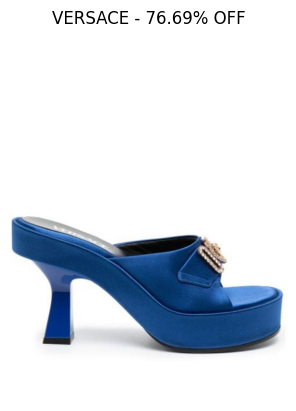

                                                       3
Brand                                            VERSACE
Discount_USD                                      1744.0
Discount_pct                                       76.69
Category_1                                         SHOES
Category_2                                         MULES
Category_3                                           NaN
Product_code                                  18627235.0
Product_title         Medusa Biggie 100mm platform mules
Full_price_USD                                    2274.0
Discounted_price_USD                               530.0
Full_price_EUR                                   2091.99
Discounted_price_EUR                              487.58
Flag                                                 1.0
http://www.farfetch.com/shopping/women/versace-medusa-biggie-100mm-platform-mules-item-18627235.aspx?storeid=12629
************************************************** 



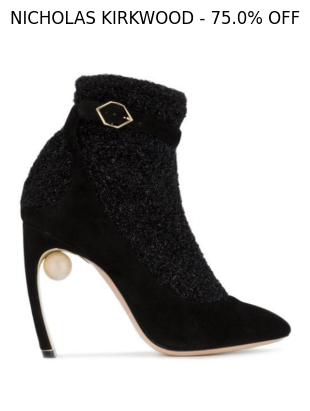

                                                    4
Brand                               NICHOLAS KIRKWOOD
Discount_USD                                   1320.0
Discount_pct                                     75.0
Category_1                                      SHOES
Category_2                                      PUMPS
Category_3                                        NaN
Product_code                               12262965.0
Product_title         Black Lola Pearl 105 Sock Boots
Full_price_USD                                 1760.0
Discounted_price_USD                            440.0
Full_price_EUR                                1619.13
Discounted_price_EUR                           404.78
Flag                                              1.0
http://www.farfetch.com/shopping/women/nicholas-kirkwood-black-lola-pearl-105-sock-boots-item-12262965.aspx?storeid=9017
************************************************** 



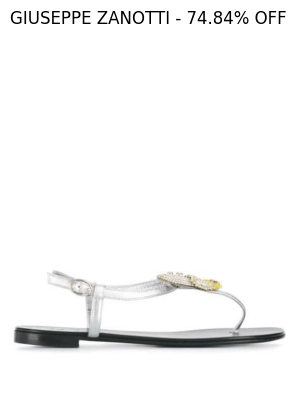

                                          5
Brand                      GIUSEPPE ZANOTTI
Discount_USD                          595.0
Discount_pct                          74.84
Category_1                            SHOES
Category_2                          SANDALS
Category_3                              NaN
Product_code                     13808939.0
Product_title         Tropical Hali sandals
Full_price_USD                        795.0
Discounted_price_USD                  200.0
Full_price_EUR                       731.37
Discounted_price_EUR                 183.99
Flag                                    1.0
http://www.farfetch.com/shopping/women/giuseppe-zanotti-tropical-hali-sandals-item-13808939.aspx?storeid=11909
************************************************** 



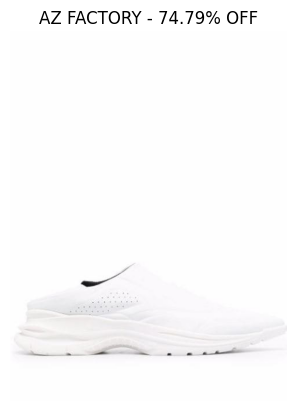

                                                   6
Brand                                     AZ FACTORY
Discount_USD                                   356.0
Discount_pct                                   74.79
Category_1                                     SHOES
Category_2                                  SNEAKERS
Category_3                                       NaN
Product_code                              16899336.0
Product_title         Pointy Sneaks slip-on sneakers
Full_price_USD                                 476.0
Discounted_price_USD                           120.0
Full_price_EUR                                 437.9
Discounted_price_EUR                          110.39
Flag                                             1.0
http://www.farfetch.com/shopping/women/az-factory-pointy-sneaks-slip-on-sneakers-item-16899336.aspx?storeid=13446
************************************************** 



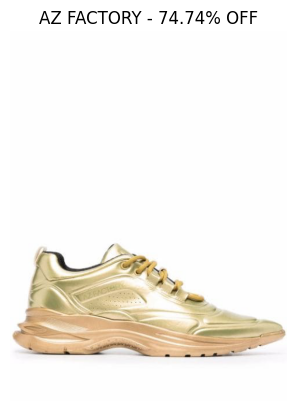

                                           7
Brand                             AZ FACTORY
Discount_USD                           429.0
Discount_pct                           74.74
Category_1                             SHOES
Category_2                          SNEAKERS
Category_3                               NaN
Product_code                      16899340.0
Product_title         Pointy Sneaks sneakers
Full_price_USD                         574.0
Discounted_price_USD                   145.0
Full_price_EUR                        528.05
Discounted_price_EUR                  133.39
Flag                                     1.0
http://www.farfetch.com/shopping/women/az-factory-pointy-sneaks-sneakers-item-16899340.aspx?storeid=13446
************************************************** 



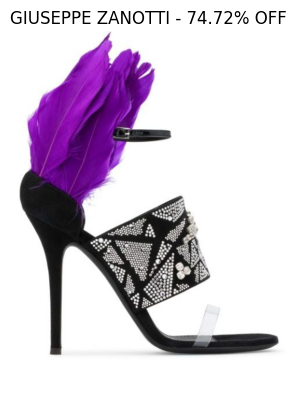

                                                 8
Brand                             GIUSEPPE ZANOTTI
Discount_USD                                1117.0
Discount_pct                                 74.72
Category_1                                   SHOES
Category_2                                 SANDALS
Category_3                                     NaN
Product_code                            18300172.0
Product_title         Talia feather-detail sandals
Full_price_USD                              1495.0
Discounted_price_USD                         378.0
Full_price_EUR                             1375.34
Discounted_price_EUR                        347.74
Flag                                           1.0
http://www.farfetch.com/shopping/women/giuseppe-zanotti-talia-feather-detail-sandals-item-18300172.aspx?storeid=11909
************************************************** 



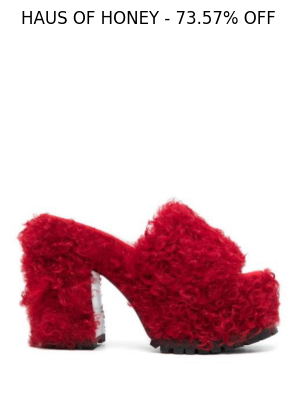

                                                 9
Brand                                HAUS OF HONEY
Discount_USD                                 952.0
Discount_pct                                 73.57
Category_1                                   SHOES
Category_2                                   MULES
Category_3                                     NaN
Product_code                            19230199.0
Product_title         Les Terriers shearling mules
Full_price_USD                              1294.0
Discounted_price_USD                         342.0
Full_price_EUR                             1190.43
Discounted_price_EUR                        314.62
Flag                                           1.0
http://www.farfetch.com/shopping/women/haus-of-honey-les-terriers-shearling-mules-item-19230199.aspx?storeid=13537
************************************************** 



In [ ]:
discount_pct('SHOES',10)

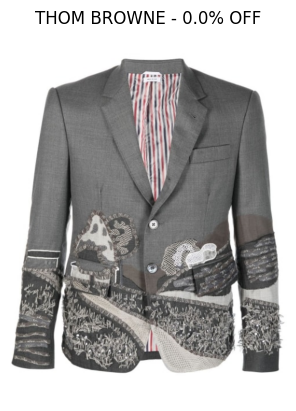

                                                       0
Brand                                        THOM BROWNE
Discount_USD                                         0.0
Discount_pct                                         0.0
Category_1                                      CLOTHING
Category_2                                       JACKETS
Category_3                                       BLAZERS
Product_code                                  18589474.0
Product_title         embroidered single-breasted blazer
Full_price_USD                                   15000.0
Discounted_price_USD                             15000.0
Full_price_EUR                                  13799.44
Discounted_price_EUR                            13799.44
Flag                                                 0.0
http://www.farfetch.com/shopping/men/thom-browne-embroidered-single-breasted-blazer-item-18589474.aspx?storeid=10552
************************************************** 



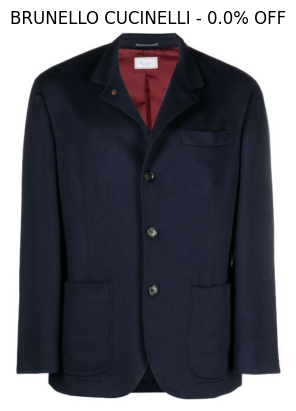

                                                        1
Brand                                  BRUNELLO CUCINELLI
Discount_USD                                          0.0
Discount_pct                                          0.0
Category_1                                       CLOTHING
Category_2                                        JACKETS
Category_3                                        BLAZERS
Product_code                                   20237533.0
Product_title         notched-lapels cashmere-wool blazer
Full_price_USD                                    14995.0
Discounted_price_USD                              14995.0
Full_price_EUR                                   13794.84
Discounted_price_EUR                             13794.84
Flag                                                  0.0
http://www.farfetch.com/shopping/men/brunello-cucinelli-notched-lapels-cashmere-wool-blazer-item-20237533.aspx?storeid=12190
************************************************** 



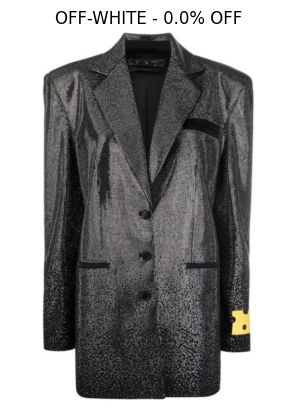

                                                             2
Brand                                                OFF-WHITE
Discount_USD                                               0.0
Discount_pct                                               0.0
Category_1                                            CLOTHING
Category_2                                             JACKETS
Category_3                                             BLAZERS
Product_code                                        18532355.0
Product_title         Bling embellished single-breasted blazer
Full_price_USD                                         13420.0
Discounted_price_USD                                   13420.0
Full_price_EUR                                         12345.9
Discounted_price_EUR                                   12345.9
Flag                                                       0.0
http://www.farfetch.com/shopping/women/off-white-bling-embellished-single-breasted-blazer-item-18532355.aspx?storeid=1

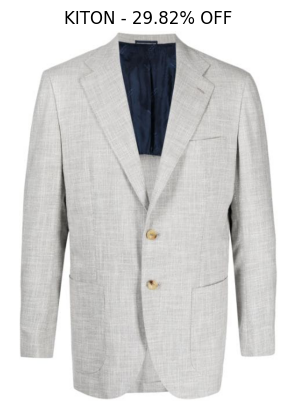

                                                      3
Brand                                             KITON
Discount_USD                                     3890.0
Discount_pct                                      29.82
Category_1                                     CLOTHING
Category_2                                      JACKETS
Category_3                                      BLAZERS
Product_code                                 20077849.0
Product_title         cashmere-blend long-sleeve blazer
Full_price_USD                                  13044.0
Discounted_price_USD                             9154.0
Full_price_EUR                                  12000.0
Discounted_price_EUR                            8421.34
Flag                                                1.0
http://www.farfetch.com/shopping/men/kiton-cashmere-blend-long-sleeve-blazer-item-20077849.aspx?storeid=11902
************************************************** 



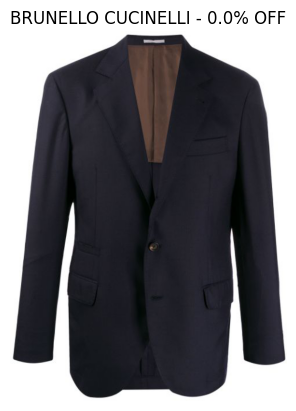

                                        4
Brand                  BRUNELLO CUCINELLI
Discount_USD                          0.0
Discount_pct                          0.0
Category_1                       CLOTHING
Category_2                        JACKETS
Category_3                        BLAZERS
Product_code                   14615286.0
Product_title         colour block blazer
Full_price_USD                     7850.0
Discounted_price_USD               7850.0
Full_price_EUR                    7221.71
Discounted_price_EUR              7221.71
Flag                                  0.0
http://www.farfetch.com/shopping/men/brunello-cucinelli-colour-block-blazer-item-14615286.aspx?storeid=12190
************************************************** 



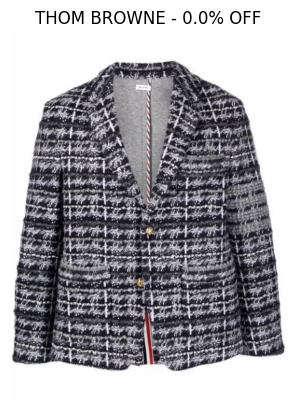

                                                 5
Brand                                  THOM BROWNE
Discount_USD                                   0.0
Discount_pct                                   0.0
Category_1                                CLOTHING
Category_2                                 JACKETS
Category_3                                 BLAZERS
Product_code                            18047990.0
Product_title         tweed single-breasted blazer
Full_price_USD                              7850.0
Discounted_price_USD                        7850.0
Full_price_EUR                             7221.71
Discounted_price_EUR                       7221.71
Flag                                           0.0
http://www.farfetch.com/shopping/men/thom-browne-tweed-single-breasted-blazer-item-18047990.aspx?storeid=12016
************************************************** 



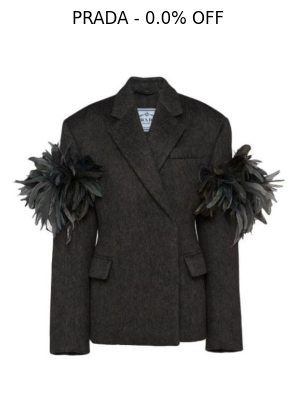

                                                6
Brand                                       PRADA
Discount_USD                                  0.0
Discount_pct                                  0.0
Category_1                               CLOTHING
Category_2                                JACKETS
Category_3                                BLAZERS
Product_code                           18903828.0
Product_title         double-breasted wool jacket
Full_price_USD                             7600.0
Discounted_price_USD                       7600.0
Full_price_EUR                            6991.72
Discounted_price_EUR                      6991.72
Flag                                          0.0
http://www.farfetch.com/shopping/women/prada-double-breasted-wool-jacket-item-18903828.aspx?storeid=11241
************************************************** 



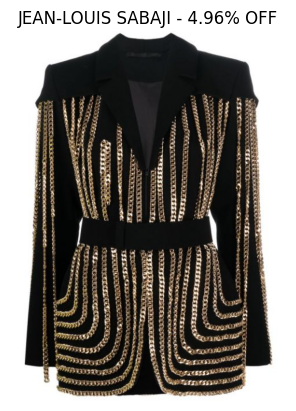

                                                        7
Brand                                   JEAN-LOUIS SABAJI
Discount_USD                                        388.0
Discount_pct                                         4.96
Category_1                                       CLOTHING
Category_2                                        JACKETS
Category_3                                        BLAZERS
Product_code                                   19622180.0
Product_title         chain-detail single-breasted blazer
Full_price_USD                                     7823.0
Discounted_price_USD                               7435.0
Full_price_EUR                                    7196.87
Discounted_price_EUR                              6839.92
Flag                                                  1.0
http://www.farfetch.com/shopping/women/jean-louis-sabaji-chain-detail-single-breasted-blazer-item-19622180.aspx?storeid=13430
************************************************** 



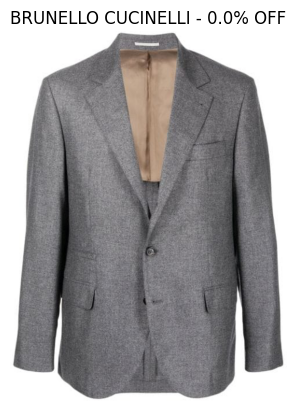

                                           8
Brand                     BRUNELLO CUCINELLI
Discount_USD                             0.0
Discount_pct                             0.0
Category_1                          CLOTHING
Category_2                           JACKETS
Category_3                           BLAZERS
Product_code                      17295402.0
Product_title         single-breasted blazer
Full_price_USD                        6995.0
Discounted_price_USD                  6995.0
Full_price_EUR                       6435.14
Discounted_price_EUR                 6435.14
Flag                                     0.0
http://www.farfetch.com/shopping/men/brunello-cucinelli-single-breasted-blazer-item-17295402.aspx?storeid=12190
************************************************** 



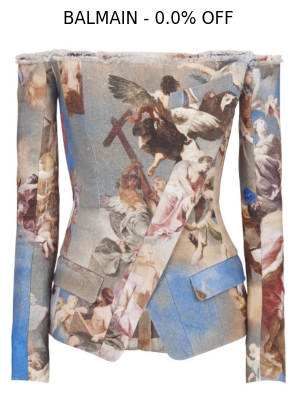

                                                      9
Brand                                           BALMAIN
Discount_USD                                        0.0
Discount_pct                                        0.0
Category_1                                     CLOTHING
Category_2                                      JACKETS
Category_3                                      BLAZERS
Product_code                                 19684806.0
Product_title         sky-print off-the-shoulder jacket
Full_price_USD                                   6695.0
Discounted_price_USD                             6695.0
Full_price_EUR                                  6159.15
Discounted_price_EUR                            6159.15
Flag                                                0.0
http://www.farfetch.com/shopping/women/balmain-sky-print-off-the-shoulder-jacket-item-19684806.aspx?storeid=14221
************************************************** 



In [ ]:
Expensive_price('BLAZERS',10)

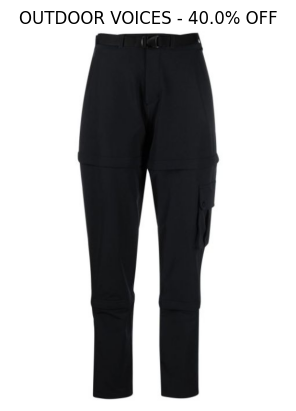

                                             0
Brand                           OUTDOOR VOICES
Discount_USD                              28.0
Discount_pct                              40.0
Category_1                            CLOTHING
Category_2                               PANTS
Category_3                          SWEATPANTS
Product_code                        19044122.0
Product_title         straight-leg track pants
Full_price_USD                            70.0
Discounted_price_USD                      42.0
Full_price_EUR                           64.39
Discounted_price_EUR                     38.63
Flag                                       1.0
http://www.farfetch.com/shopping/women/outdoor-voices-straight-leg-track-pants-item-19044122.aspx?storeid=13537
************************************************** 



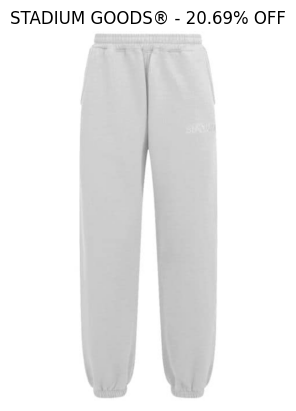

                                                     1
Brand                                   STADIUM GOODS®
Discount_USD                                      12.0
Discount_pct                                     20.69
Category_1                                    CLOTHING
Category_2                                       PANTS
Category_3                                  SWEATPANTS
Product_code                                18578759.0
Product_title         Eco logo-embroidered track pants
Full_price_USD                                    58.0
Discounted_price_USD                              46.0
Full_price_EUR                                   53.35
Discounted_price_EUR                             42.31
Flag                                               1.0
http://www.farfetch.com/shopping/men/stadium-goods-eco-logo-embroidered-track-pants-item-18578759.aspx?storeid=11218
************************************************** 



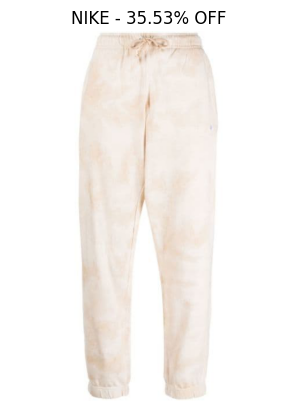

                                                 2
Brand                                         NIKE
Discount_USD                                  27.0
Discount_pct                                 35.53
Category_1                                CLOTHING
Category_2                                   PANTS
Category_3                              SWEATPANTS
Product_code                            18781024.0
Product_title         Cloud-Dye cotton track pants
Full_price_USD                                76.0
Discounted_price_USD                          49.0
Full_price_EUR                               69.91
Discounted_price_EUR                         45.07
Flag                                           1.0
http://www.farfetch.com/shopping/women/nike-cloud-dye-cotton-track-pants-item-18781024.aspx?storeid=9446
************************************************** 



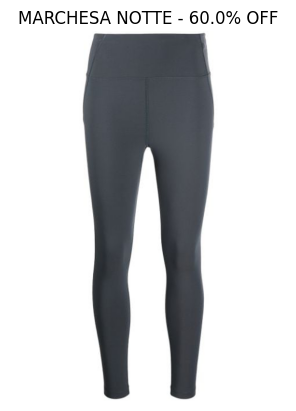

                                         3
Brand                       MARCHESA NOTTE
Discount_USD                          75.0
Discount_pct                          60.0
Category_1                        CLOTHING
Category_2                           PANTS
Category_3                        LEGGINGS
Product_code                    17284522.0
Product_title         seam-detail leggings
Full_price_USD                       125.0
Discounted_price_USD                  50.0
Full_price_EUR                      114.99
Discounted_price_EUR                 45.99
Flag                                   1.0
http://www.farfetch.com/shopping/women/marchesa-notte-seam-detail-leggings-item-17284522.aspx?storeid=10185
************************************************** 



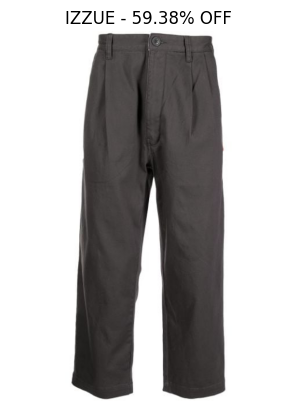

                                       4
Brand                              IZZUE
Discount_USD                        76.0
Discount_pct                       59.38
Category_1                      CLOTHING
Category_2                         PANTS
Category_3                        CHINOS
Product_code                  17168113.0
Product_title         cropped-leg chinos
Full_price_USD                     128.0
Discounted_price_USD                52.0
Full_price_EUR                    117.75
Discounted_price_EUR               47.83
Flag                                 1.0
http://www.farfetch.com/shopping/men/izzue-cropped-leg-chinos-item-17168113.aspx?storeid=12667
************************************************** 



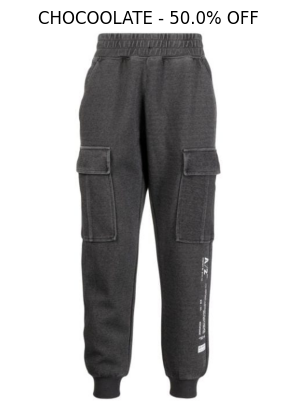

                                            5
Brand                              CHOCOOLATE
Discount_USD                             54.0
Discount_pct                             50.0
Category_1                           CLOTHING
Category_2                              PANTS
Category_3                      TAPERED PANTS
Product_code                       19480437.0
Product_title         tapered-leg track pants
Full_price_USD                          108.0
Discounted_price_USD                     54.0
Full_price_EUR                          99.35
Discounted_price_EUR                    49.67
Flag                                      1.0
http://www.farfetch.com/shopping/men/chocoolate-tapered-leg-track-pants-item-19480437.aspx?storeid=12667
************************************************** 



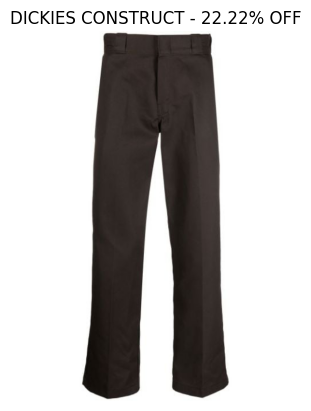

                                                     6
Brand                                DICKIES CONSTRUCT
Discount_USD                                      16.0
Discount_pct                                     22.22
Category_1                                    CLOTHING
Category_2                                       PANTS
Category_3            REGULAR-FIT & STRAIGHT LEG PANTS
Product_code                                18320956.0
Product_title                 rear logo-patch trousers
Full_price_USD                                    72.0
Discounted_price_USD                              56.0
Full_price_EUR                                   66.23
Discounted_price_EUR                             51.51
Flag                                               1.0
http://www.farfetch.com/shopping/men/dickies-construct-rear-logo-patch-trousers-item-18320956.aspx?storeid=9474
************************************************** 



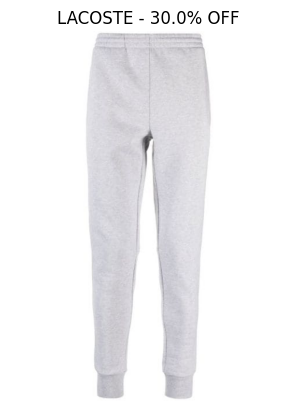

                                           7
Brand                                LACOSTE
Discount_USD                            24.0
Discount_pct                            30.0
Category_1                          CLOTHING
Category_2                             PANTS
Category_3                        SWEATPANTS
Product_code                      19324046.0
Product_title         logo-patch track pants
Full_price_USD                          80.0
Discounted_price_USD                    56.0
Full_price_EUR                         73.59
Discounted_price_EUR                   51.51
Flag                                     1.0
http://www.farfetch.com/shopping/men/lacoste-logo-patch-track-pants-item-19324046.aspx?storeid=13537
************************************************** 



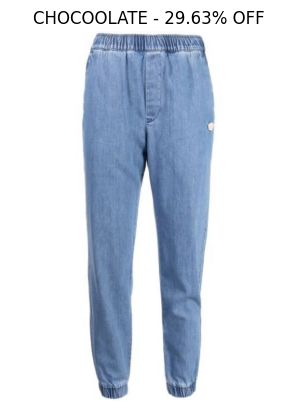

                                             8
Brand                               CHOCOOLATE
Discount_USD                              24.0
Discount_pct                             29.63
Category_1                            CLOTHING
Category_2                               PANTS
Category_3                          SWEATPANTS
Product_code                        19578119.0
Product_title         denim straight-leg jeans
Full_price_USD                            81.0
Discounted_price_USD                      57.0
Full_price_EUR                           74.51
Discounted_price_EUR                     52.43
Flag                                       1.0
http://www.farfetch.com/shopping/women/chocoolate-denim-straight-leg-jeans-item-19578119.aspx?storeid=12667
************************************************** 



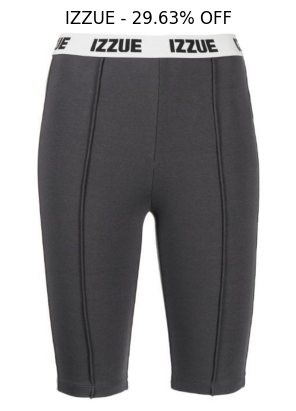

                                             9
Brand                                    IZZUE
Discount_USD                              24.0
Discount_pct                             29.63
Category_1                            CLOTHING
Category_2                               PANTS
Category_3                            LEGGINGS
Product_code                        20056019.0
Product_title         logo-waistband leggings 
Full_price_USD                            81.0
Discounted_price_USD                      57.0
Full_price_EUR                           74.51
Discounted_price_EUR                     52.43
Flag                                       1.0
http://www.farfetch.com/shopping/women/izzue-logo-waistband-leggings-item-20056019.aspx?storeid=12667
************************************************** 



In [ ]:
Cheap_price('PANTS',10)

# Back to Analysis

In [ ]:
df.head()

Website_name Competence_date Country_code Currency_Code            Brand  \
0     Farfetch      2023-06-23          USA           USD  GUCCI PRE-OWNED   
1     Farfetch      2023-06-23          USA           USD           RAMAEL   
2     Farfetch      2023-06-23          USA           USD        OFF-WHITE   
3     Farfetch      2023-06-23          USA           USD          LARDINI   
4     Farfetch      2023-06-23          USA           USD        FERRAGAMO   

  Category_1      Category_2        Category_3  Product_code  \
0  PRE-OWNED  PRE-OWNED BAGS               NaN    20212693.0   
1   CLOTHING           KNITS  KNITTED SWEATERS    19204766.0   
2   CLOTHING         JACKETS           BLAZERS    18532355.0   
3   CLOTHING          SHIRTS               NaN    20132383.0   
4      SHOES         SANDALS               NaN    19628761.0   

                              Product_title  \
0                        Abbey shoulder bag   
1            brushed-finish oversize jumper   
2  Bling embellished single-breasted blazer   
3         long-sleeve buttoned cotton shirt   
4                85mm leather wedge sandals   

                                                 URL  \
0  http://www.farfetch.com/shopping/women/gucci-p...   
1  http://www.farfetch.com/shopping/women/ramael-...   
2  http://www.farfetch.com/shopping/women/off-whi...   
3  http://www.farfetch.com/shopping/men/lardini-l...   
4  http://www.farfetch.com/shopping/women/ferraga...   

                                           image_URL  Full_price_USD  \
0  https://cdn-images.farfetch-contents.com/20/21...           551.0   
1  https://cdn-images.farfetch-contents.com/19/20...           522.0   
2  https://cdn-images.farfetch-contents.com/18/53...         13420.0   
3  https://cdn-images.farfetch-contents.com/20/13...           220.0   
4  https://cdn-images.farfetch-contents.com/19/62...          1190.0   

   Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
0                 441.0          506.89                405.70   1.0   
1                 262.0          480.22                241.03   1.0   
2               13420.0        12345.90              12345.90   0.0   
3                 218.0          202.39                200.55   1.0   
4                 479.0         1094.75                440.66   1.0   

   Discount_USD  Discount_pct  
0         110.0         19.96  
1         260.0         49.81  
2           0.0          0.00  
3           2.0          0.91  
4         711.0         59.75

In [ ]:
df.columns

Index(['Website_name', 'Competence_date', 'Country_code', 'Currency_Code',
       'Brand', 'Category_1', 'Category_2', 'Category_3', 'Product_code',
       'Product_title', 'URL', 'image_URL', 'Full_price_USD',
       'Discounted_price_USD', 'Full_price_EUR', 'Discounted_price_EUR',
       'Flag', 'Discount_USD', 'Discount_pct'],
      dtype='object')

In [ ]:
df_a = df[['Brand', 'Category_1', 'Category_2', 'Category_3', 'Product_code',
       'Product_title', 'URL', 'image_URL', 'Full_price_USD',
       'Discounted_price_USD', 'Full_price_EUR', 'Discounted_price_EUR',
       'Flag', 'Discount_USD', 'Discount_pct']]

In [ ]:
df_a

Brand            Category_1                  Category_2  \
0       GUCCI PRE-OWNED             PRE-OWNED              PRE-OWNED BAGS   
1                RAMAEL              CLOTHING                       KNITS   
2             OFF-WHITE              CLOTHING                     JACKETS   
3               LARDINI              CLOTHING                      SHIRTS   
4             FERRAGAMO                 SHOES                     SANDALS   
...                 ...                   ...                         ...   
111907     FLEUR DU MAL  LINGERIE & NIGHTWEAR                     PANTIES   
111908   MICHELLE MASON              CLOTHING                     DRESSES   
111909         BURBERRY                  BAGS  MESSENGER & CROSSBODY BAGS   
111910           JORDAN                 SHOES                    SNEAKERS   
111911   THE ALKEMISTRY          FINE JEWELRY                   FINE NECK   

                      Category_3  Product_code  \
0                            NaN    20212693.0   
1               KNITTED SWEATERS    19204766.0   
2                        BLAZERS    18532355.0   
3                            NaN    20132383.0   
4                            NaN    19628761.0   
...                          ...           ...   
111907                       NaN    17528606.0   
111908  COCKTAIL & PARTY DRESSES    19845927.0   
111909                       NaN    20236279.0   
111910                   HI-TOPS    14083185.0   
111911                       NaN           NaN   

                                   Product_title  \
0                             Abbey shoulder bag   
1                 brushed-finish oversize jumper   
2       Bling embellished single-breasted blazer   
3              long-sleeve buttoned cotton shirt   
4                     85mm leather wedge sandals   
...                                          ...   
111907            Lily embroidered hipster thong   
111908                        bias-cut silk gown   
111909          small Lola quilted crossbody bag   
111910    Air Jordan 6 Rings Black Ice" sneakers   
111911                                       NaN   

                                                      URL  \
0       http://www.farfetch.com/shopping/women/gucci-p...   
1       http://www.farfetch.com/shopping/women/ramael-...   
2       http://www.farfetch.com/shopping/women/off-whi...   
3       http://www.farfetch.com/shopping/men/lardini-l...   
4       http://www.farfetch.com/shopping/women/ferraga...   
...                                                   ...   
111907  http://www.farfetch.com/shopping/women/fleur-d...   
111908  http://www.farfetch.com/shopping/women/michell...   
111909  http://www.farfetch.com/shopping/women/burberr...   
111910  http://www.farfetch.com/shopping/men/jordan-ai...   
111911                                                NaN   

                                                image_URL  Full_price_USD  \
0       https://cdn-images.farfetch-contents.com/20/21...           551.0   
1       https://cdn-images.farfetch-contents.com/19/20...           522.0   
2       https://cdn-images.farfetch-contents.com/18/53...         13420.0   
3       https://cdn-images.farfetch-contents.com/20/13...           220.0   
4       https://cdn-images.farfetch-contents.com/19/62...          1190.0   
...                                                   ...             ...   
111907  https://cdn-images.farfetch-contents.com/17/52...            58.0   
111908  https://cdn-images.farfetch-contents.com/19/84...           850.0   
111909  https://cdn-images.farfetch-contents.com/20/23...          2150.0   
111910  https://cdn-images.farfetch-contents.com/14/08...           165.0   
111911                                                NaN             NaN   

        Discounted_price_USD  Full_price_EUR  Discounted_price_EUR  Flag  \
0                      441.0          506.89                405.70   1.0   
1                      262.0          480.22             

In [ ]:
Numbers = ['Full_price_USD','Discounted_price_USD','Full_price_EUR','Discounted_price_EUR','Flag','Discount_USD','Discount_pct']
Cat = ['Brand','Category_1','Category_2','Category_3']

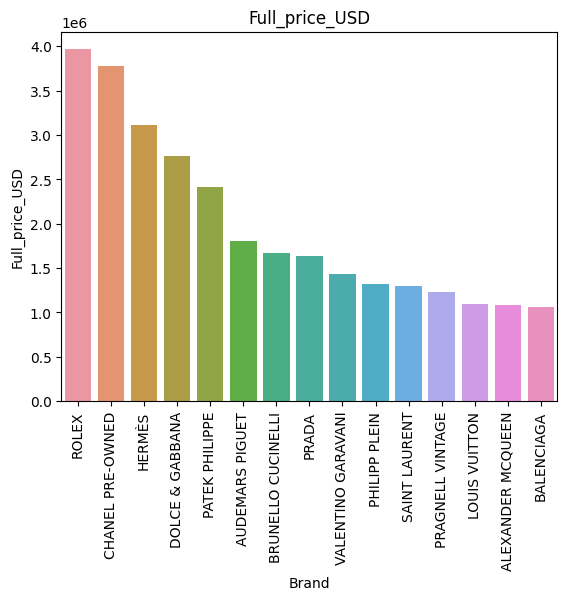

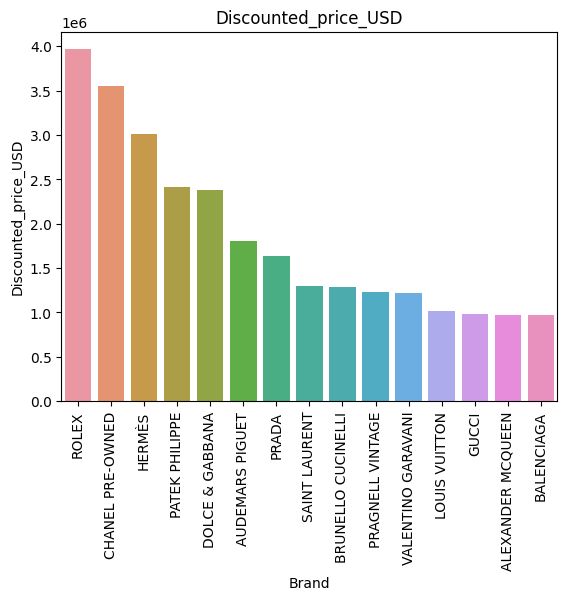

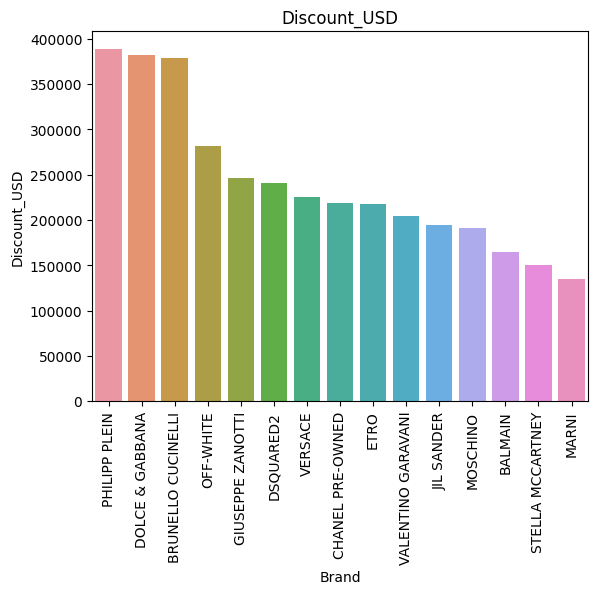

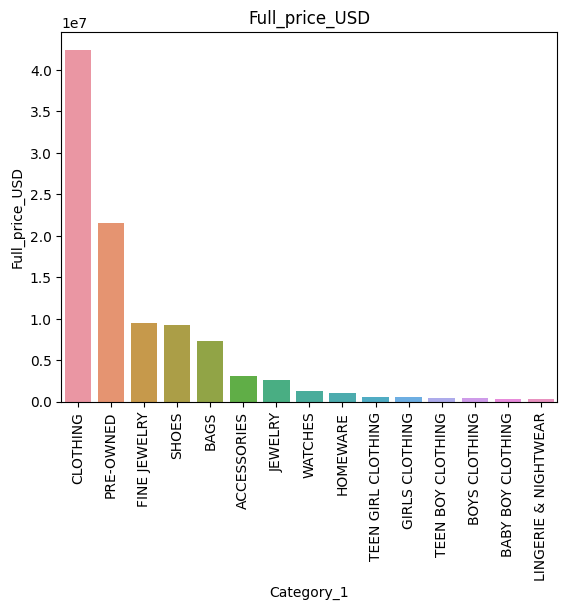

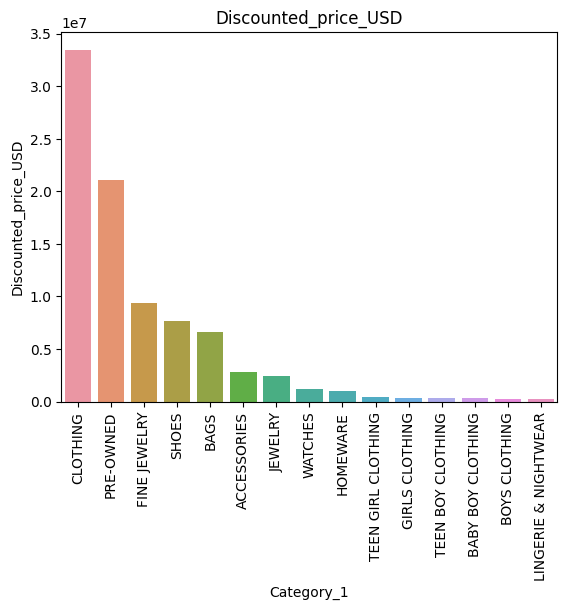

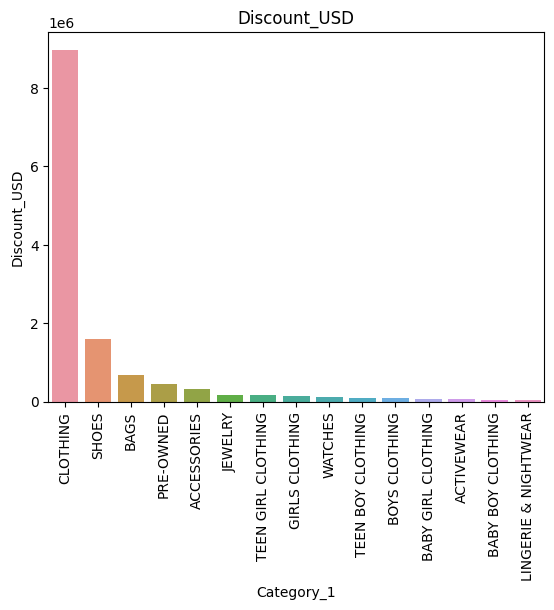

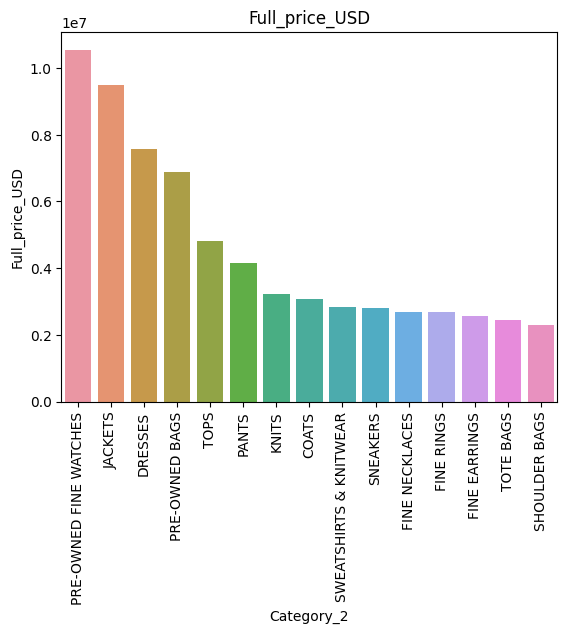

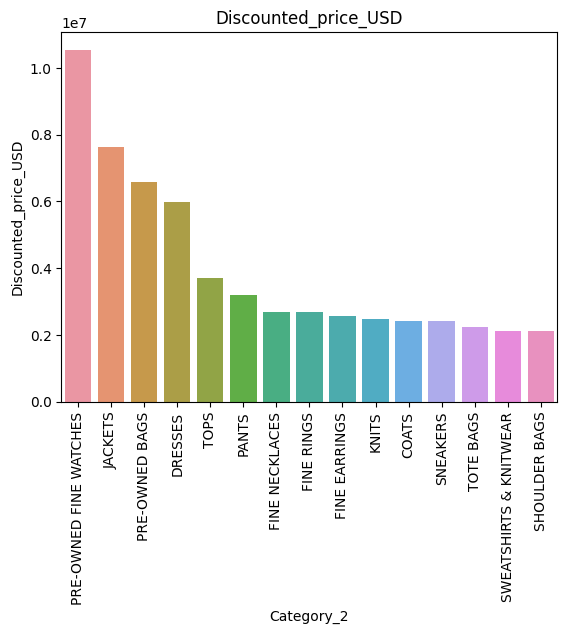

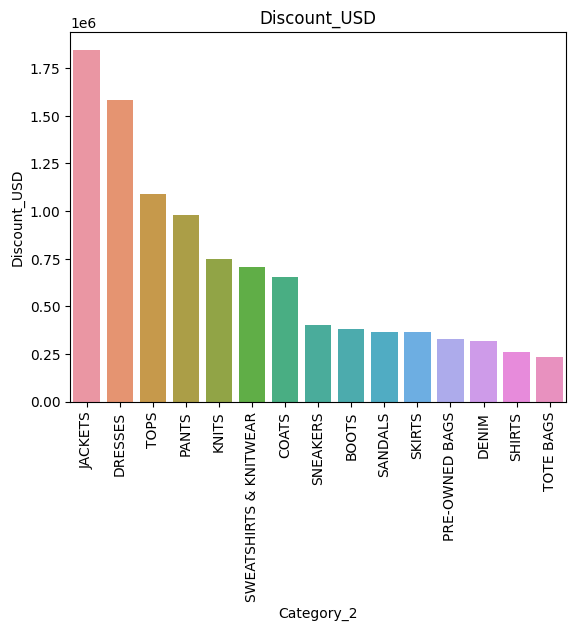

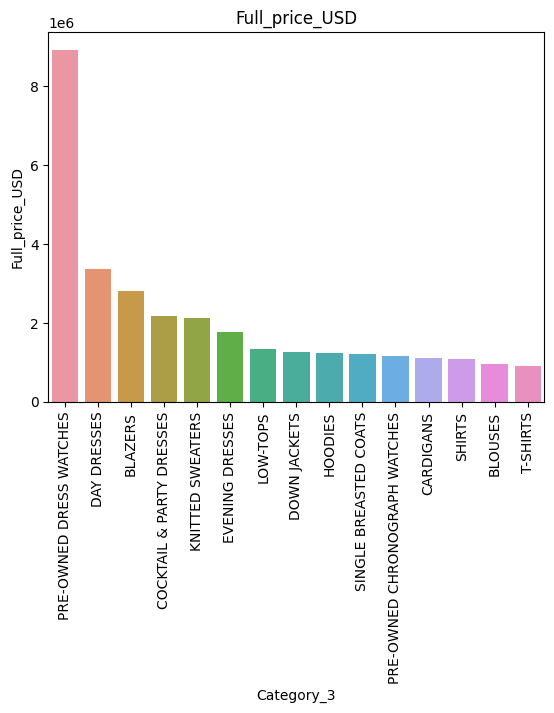

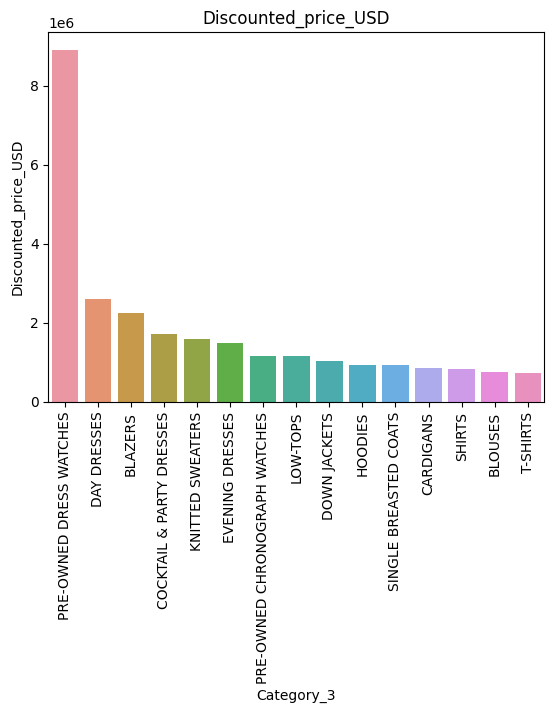

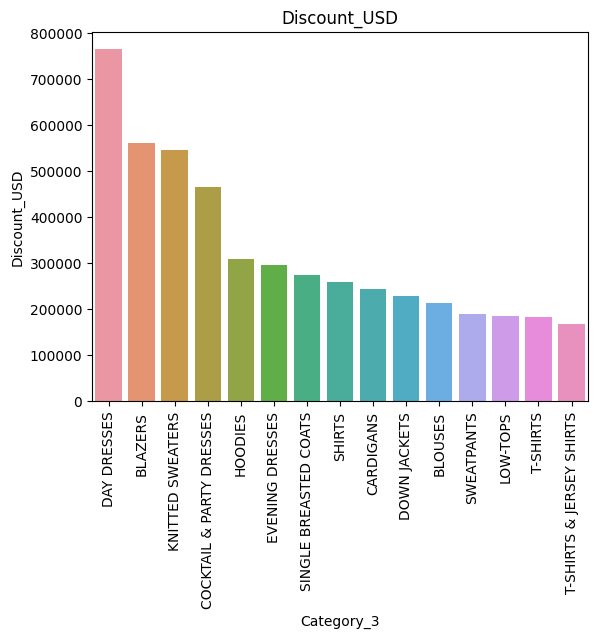

In [ ]:
n = 15
for a in Cat:
    for i in ['Full_price_USD','Discounted_price_USD','Discount_USD']:
        data1 = df_a.groupby([a], as_index=False)[Numbers].sum().sort_values(i, ascending = False)
        sns.barplot(x = data1[a][:n], y = data1[i][:n])
        plt.xticks(rotation=90)
        plt.title(i)
        plt.show()

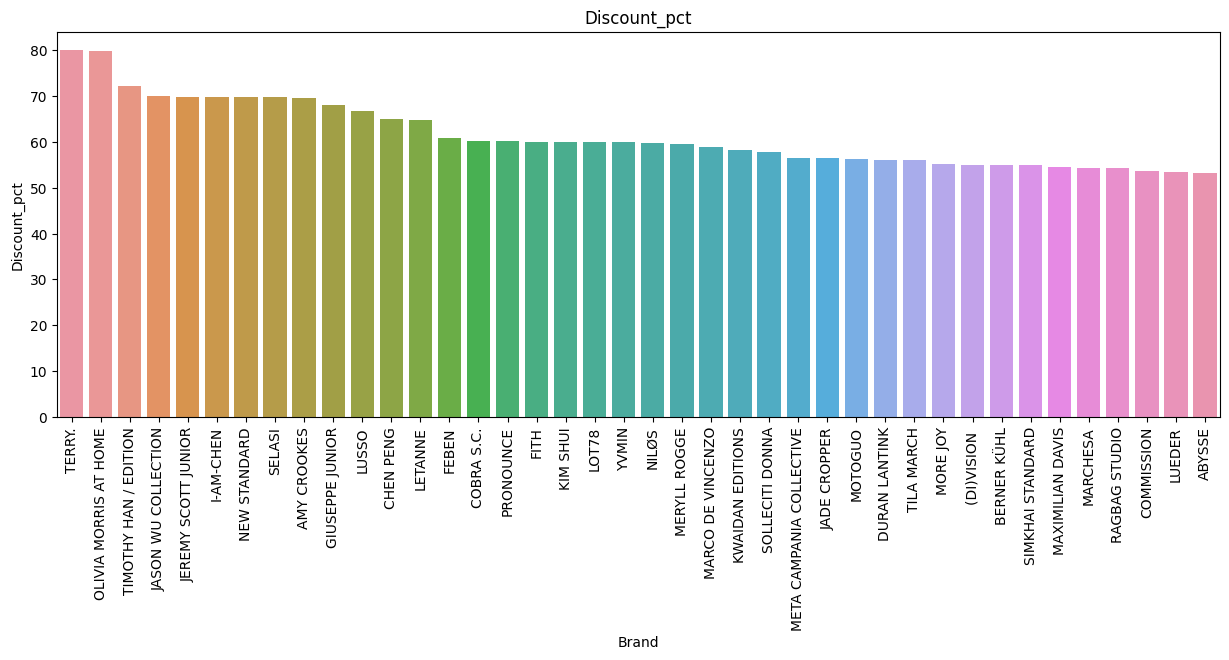

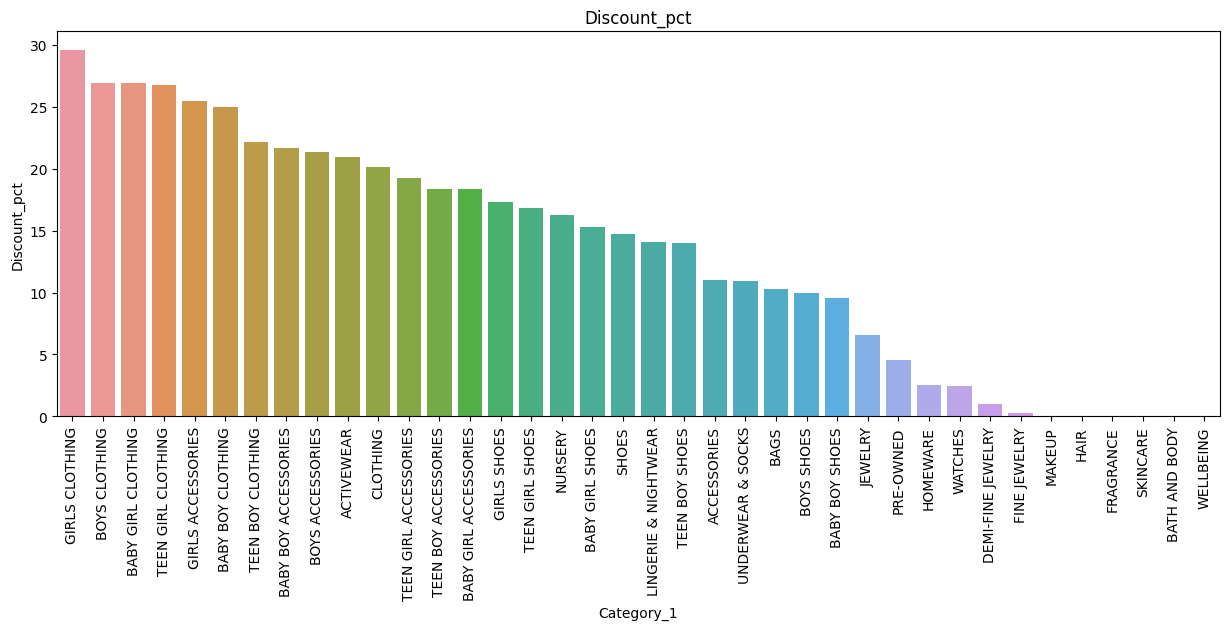

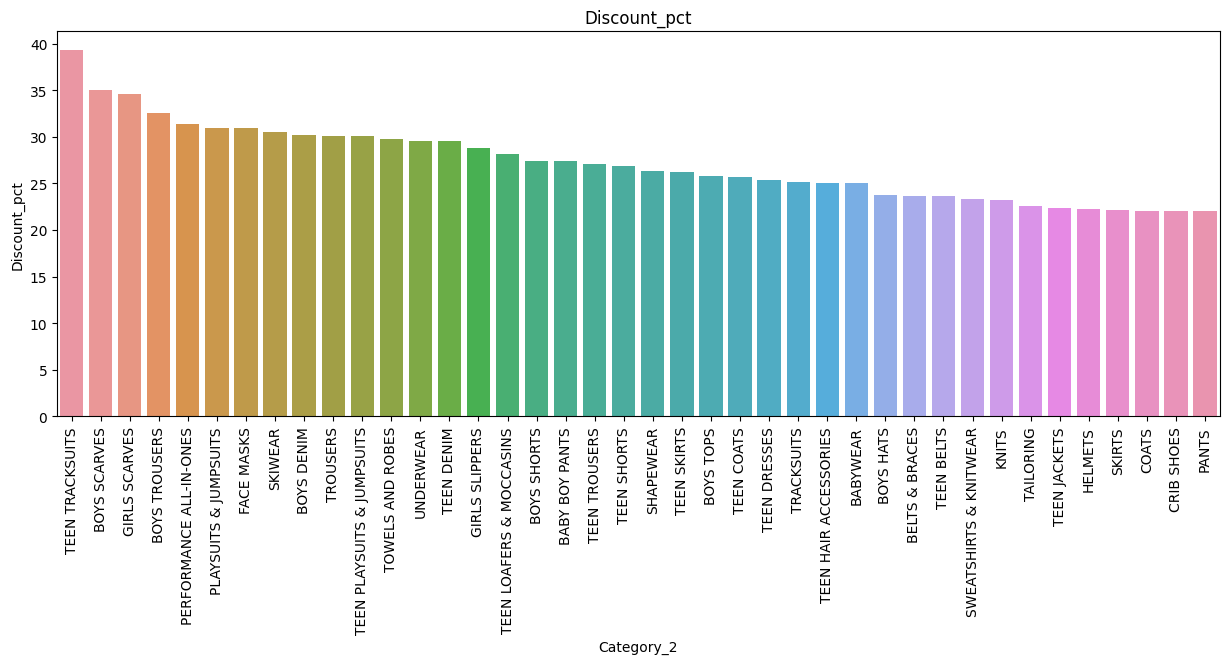

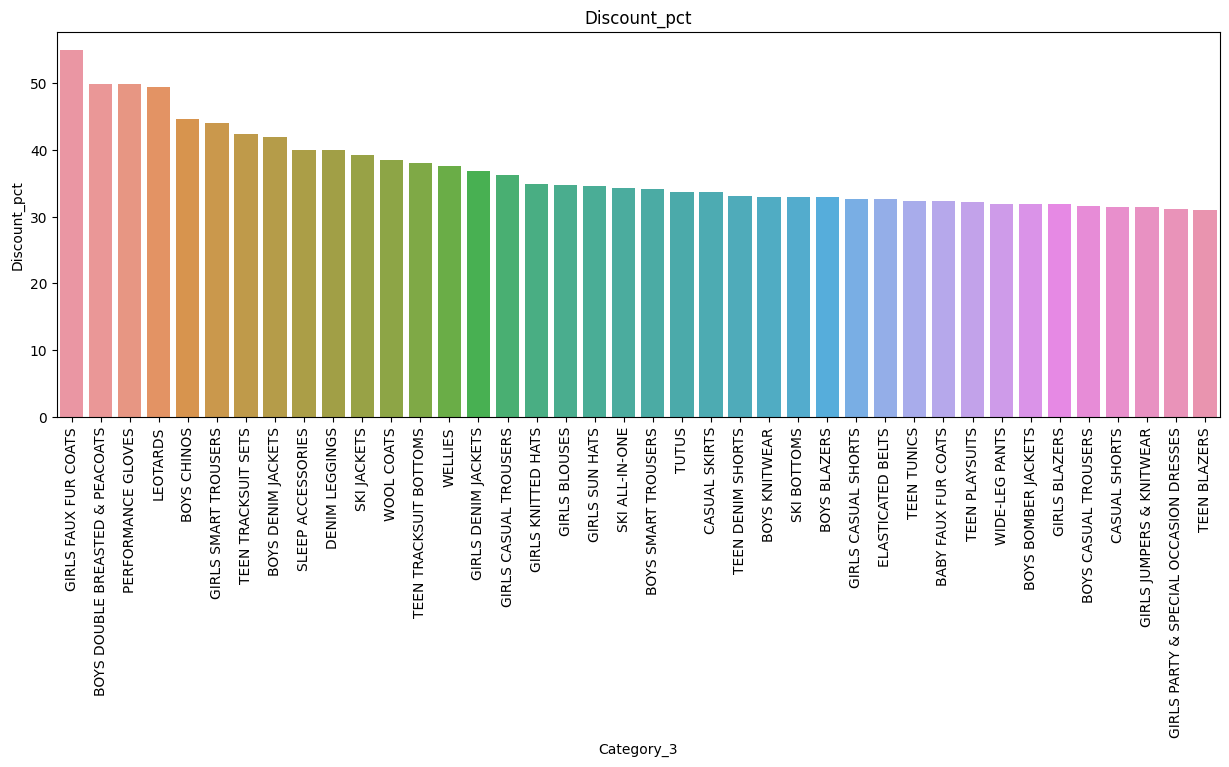

In [ ]:
for a in Cat:
    for i in ['Discount_pct']:
        plt.figure(figsize=(15,5))
        data1 = df_a.groupby([a], as_index=False)[Numbers].mean().sort_values(i, ascending = False)
        sns.barplot(x = data1[a][:40], y = data1[i][:40])
        plt.xticks(rotation=90)
        plt.title(i)
        plt.show()

<Axes: xlabel='Discounted_price_USD', ylabel='Full_price_USD'>

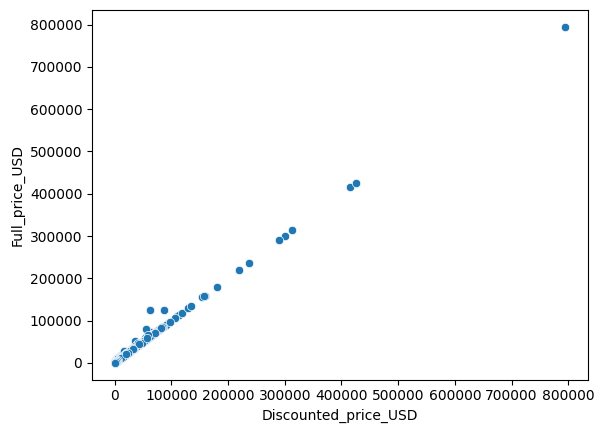

In [ ]:
sns.scatterplot(y = df_a['Full_price_USD'], x = df_a['Discounted_price_USD'])

In [ ]:
df_a.columns

Index(['Brand', 'Category_1', 'Category_2', 'Category_3', 'Product_code',
       'Product_title', 'URL', 'image_URL', 'Full_price_USD',
       'Discounted_price_USD', 'Full_price_EUR', 'Discounted_price_EUR',
       'Flag', 'Discount_USD', 'Discount_pct'],
      dtype='object')

<ipython-input-144-e6578d46ad52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_a[df_a['Discount_pct']!=0]['Discount_pct'], bins=20, kde=False)


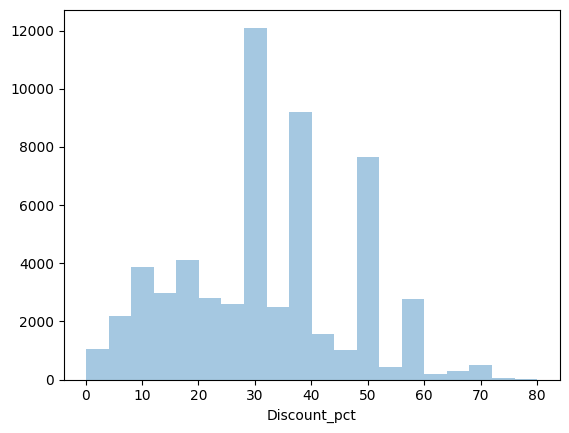

In [ ]:
sns.distplot(df_a[df_a['Discount_pct']!=0]['Discount_pct'], bins=20, kde=False)
plt.show()